Author: Niamh Hogan

# **Mapping the Crisis: Demographic Trends in Suicide Mortality (Ireland and EU)**


### Understanding Python Module Utilities

**Python** is a popular high-level, interpretated general programming language, known for its readability and simplicity ([GeeksforGeeks, 2025](https://www.geeksforgeeks.org/introduction-to-python/)). Python offers an extensive range of libraries, such as the ones utilized in this notebook:

- **pandas** is an open source data analysis and manipulation tool. It handles both tabular data (dataframes) & single columns and is useful for many data analysis procedures such as, cleaning & preparing data & reading & writing datasets from various file formats such as, csv ([GeeksforGeeks, 2025](https://www.geeksforgeeks.org/pandas-tutorial/)).

- **numpy** is a robust library for numerical computing in Python. It supports multi-dimensional arrays and matrices, and includes many mathematical functions for array operations. Its arrays are faster and use less memory than standard Python lists ([GeeksforGeeks, 2025](https://www.geeksforgeeks.org/numpy-tutorial/)).

- **matplotlib** is a data visualisation library that offers a wide range of plotting functionalities ([GeeksforGeeks, 2025](https://www.geeksforgeeks.org/matplotlib-tutorial/)). Most of these functionalities are included in the **matplotlib.pyplot** submodule ([W3Schools](https://www.w3schools.com/python/matplotlib_pyplot.asp)).

- **seaborn** is a powerful data visualisation module that is built on top of matplotlib and is closely integrated with the data structures from pandas. It allows the user to create attractive, informative statistical graphs with minimal code ([seaborn](https://seaborn.pydata.org/tutorial/introduction)). 

In [48]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. **Data Acquisition and Loading**  

For this project, I utilize multiple datasets taken from the Central Statistics Office, World Health Organization & Eurostat to support demographic and geographic analysis across Ireland & the EU:

- Irish suicide mortality by year, age group, and sex ([Central Statistics Office – VSA35](https://data.cso.ie/#))

- Irish suicide mortality by county and sex ([Central Statistics Office – VSA112](https://data.cso.ie/#))

- EU suicide mortality by country and sex ([World Health Organization](https://gateway.euro.who.int/en/indicators/hfamdb_761-deaths-suicide-and-intentional-self-harm/#id=31291))

- EU population data for rate standardisation ([Eurostat](https://ec.europa.eu/eurostat/databrowser/view/demo_pjan/default/table))

**1.1 Irish Deaths by Year, Age, and Sex**

I am using this dataset to examine temporal and demographic patterns in suicide mortality in Ireland. I load the CSV file from the data folder into a pandas DataFrame to allow for easier organisation, analysis & manipulation.

In [49]:
irish_age_sex_df = pd.read_csv(
    "./data/irishdata_year_age_sex_cso.csv"
)

irish_age_sex_df.head()

,Statistic Label,Year,Sex,Cause of Death,Age Group at Death,UNIT,VALUE
0,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,Under 1 year,Number,NaN
1,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,1 - 4 years,Number,NaN
2,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,5 - 9 years,Number,NaN
3,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,10 - 14 years,Number,8.0
4,Revised Deaths Occurring,2007,Both sexes,X60-X84 Intentional self-harm,15 - 19 years,Number,27.0


**1.2 Irish Deaths by County and Sex**

County-level mortality data is used to support geographic comparison within Ireland. I begin by loading the file into a pandas Dataframe and then check to ensure data has loaded correctly. 

In [50]:
irish_counties_df = pd.read_csv(
    "./data/irishdata_year_counties_sex_cso.csv"
)

irish_counties_df.head(3)

,Statistic Label,Year,Sex,County,Cause of Death,UNIT,VALUE
0,Deaths Occuring,2015,Both sexes,Ireland,Intentional self-harm (X60-X84),Number,500.0
1,Deaths Occuring,2015,Both sexes,Carlow County Council,Intentional self-harm (X60-X84),Number,7.0
2,Deaths Occuring,2015,Both sexes,Dublin City Council,Intentional self-harm (X60-X84),Number,54.0


**1.3 EU Deaths by Country and Sex**  

I utilise European suicide mortality data from the World Health Organization to compare EU countries. As the source file contains extensive metadata, I am skipping non-data rows during import ([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)). I also use *low_memory=False* to tell pandas to read the file in one pass instead of in chunks. I am then confirming that country codes, years, and death counts have loaded as expected. 

In [51]:
eu_deaths_df = pd.read_csv(
    "./data/who_eu_deaths.csv",
    skiprows=30,
    low_memory=False,
)

eu_deaths_df.head(3)

,COUNTRY,COUNTRY_GRP,AGE_GRP_LIST,SEX,SUBNATIONAL_MDB,YEAR,VALUE
0,ALB,NaN,TOTAL,FEMALE,NaN,1987.0,25.0
1,ALB,NaN,TOTAL,FEMALE,NaN,1988.0,22.0
2,ALB,NaN,TOTAL,FEMALE,NaN,1989.0,15.0


**1.4 EU Population**  

I am loading EU population data from Eurostat to allow EU death counts to be interpreted relative to the countries population size. Including population data supports fair cross-country comparisons and avoids misleading conclusions based solely on absolute death counts ([Health Knowledge](https://www.healthknowledge.org.uk/e-learning/epidemiology/specialists/standardisation?utm_source=chatgpt.com)).

In [52]:
eu_pop_df = pd.read_csv(
    "./data/eu_pop_2012_2022.csv"
)

eu_pop_df.head(3)

,Time,geo,Value,age,sex,unit
0,2012,AT,8408121,TOTAL,T,NR
1,2012,BE,11075889,TOTAL,T,NR
2,2012,BG,7327224,TOTAL,T,NR


## **2. Data Cleaning and Preparation**  

In this section, I clean and transform each dataset to ensure consistency, accuracy, and suitability for analysis.

### **2.1 Cleaning Irish Age and Sex Mortality Data**  

**Removing Unnecessary Columns**

Here, I simplify the dataset by removing columns that contain descriptive metadata rather than analytical variables ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)). The Statistic Label, Cause of Death, and UNIT fields do not contribute to numerical analysis, and removing them reduces noise and improves readability. Retaining only relevant variables allows subsequent cleaning and aggregation steps to be carried out more efficiently. 

In [53]:
DROP_COLS_AGE_SEX = ["Statistic Label", "Cause of Death", "UNIT"]

irish_age_sex_df.drop(columns=DROP_COLS_AGE_SEX, inplace=True)

print(irish_age_sex_df.head(3))

   Year         Sex Age Group at Death  VALUE
0  2007  Both sexes       Under 1 year    NaN
1  2007  Both sexes        1 - 4 years    NaN
2  2007  Both sexes        5 - 9 years    NaN


**Inspecting Dataset Structure**

I review the structure of the cleaned dataset to confirm the number of observations, variable types, and the presence of missing values ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)). This step allows me to verify that the data has loaded correctly and to identify potential issues, such as unexpected null values or inappropriate data types, before proceeding with further transformations. 

In [54]:
print(irish_age_sex_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                960 non-null    int64  
 1   Sex                 960 non-null    object 
 2   Age Group at Death  960 non-null    object 
 3   VALUE               782 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.1+ KB
None


**Converting Data Types**

I am converting the `VALUE` column, which represents the number of deaths, from float to pandas’ nullable integer type ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)). This supports accurate aggregation and summarisation while preserving information about missing values. Using a nullable integer type ensures that missing observations are not silently coerced into incorrect values during analysis ([GeeksforGeeks](https://www.geeksforgeeks.org/pandas/nullable-integer-data-type-in-pandas/)).

In [55]:
# Convert VALUE to integer type
irish_age_sex_df["VALUE"] = irish_age_sex_df["VALUE"].astype("Int64")

print(irish_age_sex_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                960 non-null    int64 
 1   Sex                 960 non-null    object
 2   Age Group at Death  960 non-null    object
 3   VALUE               782 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 31.1+ KB
None


**Inspecting and Processing Age Group Values**

I examine the unique values in the Age Group at Death column to understand the range and format of age categories present in the dataset ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Index.unique.html#pandas.Index.unique)). 

In [56]:
print(irish_age_sex_df["Age Group at Death"].unique())

['Under 1 year' '1 - 4 years' '5 - 9 years' '10 - 14 years'
 '15 - 19 years' '20 - 24 years' '25 - 29 years' '30 - 34 years'
 '35 - 39 years' '40 - 44 years' '45 - 49 years' '50 - 54 years'
 '55 - 59 years' '60 - 64 years' '65 - 69 years' '70 - 74 years'
 '75 - 79 years' '80 - 84 years' '85 years and over' 'All ages']


**Handling Missing Values**

I am checking the dataset for missing, empty, or whitespace-only values to ensure data quality prior to analysis. This includes identifying standard missing values as well as values that may appear non-null but contain no meaningful information. The following sources are used to create the below code: ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html); [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-map-function/); [StackOverFlow](https://stackoverflow.com/questions/39388950/logical-or-bitwise-or-in-pandas-data-frame)). 

In [57]:
# Check for missing, empty, or whitespace-only values
missing_values_check = (
    irish_age_sex_df.isna()
    | irish_age_sex_df.map(lambda x: str(x).strip() == "")
).sum()

print(missing_values_check)

Year                    0
Sex                     0
Age Group at Death      0
VALUE                 178
dtype: int64


I have identified missing values in the `VALUE` column (178) and will now remove these rows, as observations without recorded death counts cannot contribute meaningfully to statistical analysis. Before removal, I am converting pandas’ nullable missing values to standard NaN to ensure consistent handling ([Pandas Documentation](https://pandas.pydata.org/docs/user_guide/missing_data.html)).

In [58]:
irish_age_sex_df["VALUE"] = irish_age_sex_df["VALUE"].replace({pd.NA: np.nan})

irish_age_sex_df = irish_age_sex_df.dropna(subset=["VALUE"])

**Creating and Saving Pivot Table for Analysis**

I am summarising the cleaned `Irish Age and Sex Mortality dataset` into a pivot table to facilitate trend analysis and visualisation. To do so, I use the following sources to write the code: ([GeeksforGeeks](https://www.geeksforgeeks.org/python/python-pandas-pivot_table/]); [Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)). This involves:

- Aggregating death counts (VALUE) by year to track temporal changes.

- Organising the data by age group and sex as columns, so each combination has its own column in the table.

- Using sum as the aggregation function to combine multiple entries for the same year/age/sex combination.

- Replacing any missing values with 0 to indicate that no deaths were recorded for that category.

I am then saving the pivot table to a CSV file in the data folder so that it can be reused in further analysis and visualisations without having to repeat the cleaning and aggregation steps. I retain the DataFrame index using *index=True* so that key structural information is preserved. ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html)). 

In [59]:
# Create pivot table for analysis
irish_deaths_by_age_sex_pivot = pd.pivot_table(
    irish_age_sex_df,
    values="VALUE",
    index="Year",
    columns=["Age Group at Death", "Sex"],
    aggfunc="sum"
).fillna(0)

print(irish_deaths_by_age_sex_pivot.head(3))

# Save cleaned pivot table
irish_deaths_by_age_sex_pivot.to_csv(
    "./data/irish_deaths_by_age_sex_pivot.csv", index=True
)

Age Group at Death 10 - 14 years             15 - 19 years              \
Sex                   Both sexes Female Male    Both sexes Female Male   
Year                                                                     
2007                           8      1    7            27      7   20   
2008                           4      1    3            47     18   29   
2009                           5      3    2            38      7   31   

Age Group at Death 20 - 24 years             25 - 29 years  ... 75 - 79 years  \
Sex                   Both sexes Female Male    Both sexes  ...          Male   
Year                                                        ...                 
2007                          69      9   60            69  ...             5   
2008                          51      9   42            72  ...             4   
2009                          48      7   41            70  ...             7   

Age Group at Death 80 - 84 years             85 years and over      

### **2.2 Cleaning Irish County Mortality Data**

**Removing Unnecessary Columns**

I simplify the dataset by removing columns containing descriptive metadata (Statistic Label, Cause of Death, UNIT), which do not contribute to numerical analysis.

In [60]:
drop_col_list2= ["Statistic Label", "Cause of Death", "UNIT"]

irish_counties_df.drop(columns=drop_col_list2, inplace=True)

print(irish_counties_df.head(3))

   Year         Sex                 County  VALUE
0  2015  Both sexes                Ireland  500.0
1  2015  Both sexes  Carlow County Council    7.0
2  2015  Both sexes    Dublin City Council   54.0


**Inspecting Dataset Structure**

I review the structure of the cleaned dataset to verify the number of observations, variable types, and the presence of missing values. This allows me to confirm that the data loaded correctly and to identify any potential issues before further processing.

In [61]:
print(irish_counties_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    768 non-null    int64  
 1   Sex     768 non-null    object 
 2   County  768 non-null    object 
 3   VALUE   745 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.1+ KB
None


**Converting Data Types**

I am converting the `VALUE` column, representing the number of deaths, from float to a nullable integer type. This ensures accurate aggregation, preserves missing values, and allows arithmetic operations without errors.

In [62]:
irish_counties_df["VALUE"] = irish_counties_df["VALUE"].astype("Int64")

print(irish_counties_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    768 non-null    int64 
 1   Sex     768 non-null    object
 2   County  768 non-null    object
 3   VALUE   745 non-null    Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 24.9+ KB
None


**Handling Missing Values**

I am checking the dataset for missing, empty, or whitespace-only values to ensure data quality.

In [63]:
# Check for missing, empty, or whitespace-only values
missing_values_check = (
    irish_counties_df.isna()
    | irish_counties_df.map(lambda x: str(x).strip() == "")
).sum()

print(missing_values_check)

Year       0
Sex        0
County     0
VALUE     23
dtype: int64


 The `VALUE` column contains 23 missing entries, which I remove because observations without recorded deaths cannot be used in analysis. After this step, all columns have valid data, ensuring clean input for pivoting.

In [64]:
irish_counties_df = irish_counties_df.dropna(subset=["VALUE"])

irish_counties_df.apply(
    lambda col: col.isna().sum()
    + (col == "").sum()
    + col.astype(str).str.strip().eq("").sum()
)

Year      0
Sex       0
County    0
VALUE     0
dtype: int64

**Creating and Saving a Pivot Table**

I summarise the cleaned Irish County Mortality dataset into a pivot table to facilitate analysis of trends by county and sex. This involves:

- Aggregating death counts (VALUE) by year to track temporal changes.

- Organising the data by county and sex as columns to enable comparison across regions and demographic groups.

- Using sum as the aggregation function to combine multiple entries for the same year/county/sex combination.

I am saving the resulting pivot table to a CSV file in the data folder so that it can be reused in further analysis and visualisations without repeating cleaning steps. *index=True* is used to preserve rows & columns. 

In [65]:
irish_county_deaths_pivot = pd.pivot_table(
    irish_counties_df,
    values="VALUE",
    index="Year",
    columns=["County", "Sex"],
    aggfunc="sum",
)

print(irish_county_deaths_pivot.head(3))

# Save cleaned pivot table to folder
irish_county_deaths_pivot.to_csv(
    "./data/irish_county_deaths_pivot.csv", index=True
)

County Carlow County Council             Cavan County Council              \
Sex               Both sexes Female Male           Both sexes Female Male   
Year                                                                        
2015                       7      3    4                    7      1    6   
2016                       9      1    8                   16      5   11   
2017                       8      3    5                   12      2   10   

County Clare County Council             Cork City Council  ...  \
Sex              Both sexes Female Male        Both sexes  ...   
Year                                                       ...   
2015                     17      3   14                14  ...   
2016                     15      3   12                24  ...   
2017                     20      2   18                13  ...   

County Waterford City & County Council Westmeath County Council              \
Sex                               Male               Both sex

### **2.3 Cleaning EU Mortality Data**

**Removing Unnecessary Columns**

I drop columns (COUNTRY_GRP, AGE_GRP_LIST, SUBNATIONAL_MDB) that contain metadata not relevant for analysis. This simplifies the dataset and keeps only the variables required for calculating mortality trends across countries and years.

In [66]:
drop_col_list3= ["COUNTRY_GRP", "AGE_GRP_LIST", "SUBNATIONAL_MDB"]

eu_deaths_df.drop(columns=drop_col_list3, inplace=True)

print(eu_deaths_df.head(3))

  COUNTRY     SEX    YEAR  VALUE
0     ALB  FEMALE  1987.0   25.0
1     ALB  FEMALE  1988.0   22.0
2     ALB  FEMALE  1989.0   15.0


**Filtering by Sex**

I am retaining only rows where SEX is `“ALL”` to focus on total mortality counts rather than sex-specific deaths ensuring a consistent dataset for cross-country comparison ([W3schools](https://www.w3schools.com/python/python_operators_comparison.asp)).

In [67]:
eu_deaths_df = eu_deaths_df[eu_deaths_df["SEX"] == "ALL"]

print(eu_deaths_df.head(3))

     COUNTRY  SEX    YEAR  VALUE
4011     ALB  ALL  1987.0   73.0
4012     ALB  ALL  1988.0   63.0
4013     ALB  ALL  1989.0   68.0


**Selecting EU Member States**

I keep only EU member states in the dataset by filtering the `COUNTRY` column against a predefined list of EU countries. This ensures that the analysis reflects trends within the EU and excludes non-member countries. I then print out the countrys retained in alphabetical order for readability. I use the following sources to create the code: [Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html), [Stackoverflow](https://stackoverflow.com/questions/32072076/find-the-unique-values-in-a-column-and-then-sort-them). 

In [68]:
# EU member states
eu_members = [
    "AUT", "BEL", "BGR", "HRV", "CYP", "CZE", "DNK", "EST", "FIN", "FRA",
    "DEU", "GRC", "HUN", "IRL", "ITA", "LVA", "LTU", "LUX", "MLT", "NLD",
    "POL", "PRT", "ROU", "SVK", "SVN", "ESP", "SWE"
]

eu_deaths_df = eu_deaths_df[eu_deaths_df["COUNTRY"].isin(eu_members)]

# Print countries alphabetically 
countries = sorted((eu_deaths_df["COUNTRY"]).unique()) 

print(countries)

['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']


**Limiting Years for Analysis**

I filter the dataset using boolean indexing to include only the years 2012–2016 because other years contain too many missing values ([Pandas Documentation](https://pandas.pydata.org/docs/user_guide/indexing.html)). This ensures the mortality rates I calculate are based on complete and comparable data across countries.

In [69]:
eu_deaths_df = eu_deaths_df[
    (eu_deaths_df["YEAR"] >= 2012) & (eu_deaths_df["YEAR"] <= 2016)
]

eu_deaths_df["YEAR"].unique()

array([2012., 2013., 2014., 2015., 2016.])

In [70]:
print(eu_deaths_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 4121 to 5875
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   COUNTRY  129 non-null    object 
 1   SEX      129 non-null    object 
 2   YEAR     129 non-null    float64
 3   VALUE    129 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB
None


**Converting Data Types**

I convert `VALUE` and `YEAR` to a nullable integer type to support numerical analysis and aggregation. This allows accurate calculations, sorting, and visualisation while preserving any missing values.

In [71]:
# Convert VALUE to int
eu_deaths_df["VALUE"] = eu_deaths_df["VALUE"].astype("Int64")

# Convert YEAR to int
eu_deaths_df["YEAR"] = eu_deaths_df["YEAR"].astype("Int64")

print(eu_deaths_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 4121 to 5875
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COUNTRY  129 non-null    object
 1   SEX      129 non-null    object
 2   YEAR     129 non-null    Int64 
 3   VALUE    129 non-null    Int64 
dtypes: Int64(2), object(2)
memory usage: 5.3+ KB
None


**Checking for Missing or Invalid Data**

I check the dataset for NaN values, empty strings, or cells containing only whitespace. After this step, the dataset contains no missing or invalid values, ensuring clean input for further analysis.

In [72]:
# Check for missing, empty, or whitespace-only values
missing_values_check = (
    eu_deaths_df.isna()
    | eu_deaths_df.map(lambda x: str(x).strip() == "")
).sum()

print(missing_values_check)

COUNTRY    0
SEX        0
YEAR       0
VALUE      0
dtype: int64


### **2.4 Cleaning EU Population Data**

**Removing Unnecessary Columns**

I drop columns (age, sex, unit) that are not relevant for this analysis. This keeps only the total population counts by country and year, simplifying the dataset for rate calculations and cross-country comparisons.

In [73]:
drop_col_list4= ["age", "sex", "unit"]

eu_pop_df.drop(columns=drop_col_list4, inplace=True)

# sanity check
print(eu_pop_df.head(3)) 

   Time geo     Value
0  2012  AT   8408121
1  2012  BE  11075889
2  2012  BG   7327224


**Filtering Years for Analysis**

I am keeping only rows where Time (year) is between 2012 and 2016. This aligns the population data with the EU mortality dataset, ensuring that mortality rates are calculated using population counts from the same period.

In [74]:
eu_pop_df = eu_pop_df[(
    eu_pop_df["Time"] >= 2012) 
    & (eu_pop_df["Time"] <= 2016)
]

eu_pop_df["Time"].unique()

array([2012, 2013, 2014, 2015, 2016])

**Inspecting Dataset Structure**

I review the dataset structure to confirm that the data types are appropriate and that no missing values exist in the selected columns. This guarantees that the dataset is clean and ready for merging with mortality data and subsequent analysis.

In [75]:
print(eu_pop_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    135 non-null    int64 
 1   geo     135 non-null    object
 2   Value   135 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.2+ KB
None


### **2.5 Standardising EU Mortality Rates**  

**Renaming Columns for Clarity**

I rename the columns in the population dataset from geo → COUNTRY, Time → YEAR, and Value → POPULATION ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)).. This makes the dataset easier to understand and aligns the column names with the deaths dataset to simplify merging. *inplace=True* ensures that the operation is done on the current DataFrame ([w3schools](https://www.w3schools.com/python/pandas/ref_df_rename.asp)). 

In [76]:
eu_pop_df.rename(
    columns={"geo": "COUNTRY", "Time": "YEAR", "Value": "POPULATION"},
    inplace=True,
)

**Harmonising Country Codes Between Datasets**

I print all unique country codes in both the deaths dataset (eu_deaths_df) and the population dataset (eu_pop_df) to allow me to identify differences in how countries are coded.

- The deaths dataset uses 3-letter ISO codes (e.g., "AUT", "BEL").

- The population dataset uses 2-letter ISO codes (e.g., "AT", "BE").

In [77]:
print(sorted(eu_deaths_df["COUNTRY"].unique()))
print(sorted(eu_pop_df["COUNTRY"].unique()))

['AUT', 'BEL', 'BGR', 'CYP', 'CZE', 'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GRC', 'HRV', 'HUN', 'IRL', 'ITA', 'LTU', 'LUX', 'LVA', 'MLT', 'NLD', 'POL', 'PRT', 'ROU', 'SVK', 'SVN', 'SWE']
['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'EL', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']


I am defining a dictionary ([W3schools](https://www.w3schools.com/python/python_dictionaries.asp)) (country_code_map) to store the country code data in order to convert the 3-letter codes in the deaths dataset to the corresponding 2-letter codes used in the population dataset. This allows me to ensure that the country identifiers match exactly across both datasets.

In [78]:
country_code_map = {
    "AUT": "AT", 
    "BEL": "BE", 
    "BGR": "BG", 
    "CYP": "CY", 
    "CZE": "CZ",
    "DEU": "DE", 
    "DNK": "DK", 
    "ESP": "ES", 
    "EST": "EE", 
    "FIN": "FI",
    "FRA": "FR", 
    "GRC": "EL", 
    "HRV": "HR", 
    "HUN": "HU", 
    "IRL": "IE",
    "ITA": "IT", 
    "LTU": "LT", 
    "LUX": "LU", 
    "LVA": "LV", 
    "MLT": "MT",
    "NLD": "NL", 
    "POL": "PL", 
    "PRT": "PT", 
    "ROU": "RO", 
    "SVK": "SK",
    "SVN": "SI", 
    "SWE": "SE"
}

**Applying the Mapping**  

I use *pandas.Series.map()* to apply the mapping to the COUNTRY column in the deaths dataset ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)). After this step, both datasets use the same 2-letter country codes, which allows me to merge them correctly on COUNTRY and YEAR without any mismatches.

In [79]:
eu_deaths_df["COUNTRY"] = eu_deaths_df["COUNTRY"].map(country_code_map)

**Merging EU Deaths with Population and Calculating Mortality Rates**  

**1. Merging datasets**  
I combine the deaths dataset (eu_deaths_df) with the population dataset (eu_pop_df) using *pandas.merge()* ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)). 
- I am keeping only the columns `COUNTRY, YEAR, and POPULATION` from the population dataset to simplify the merge.  
- I am merging on `COUNTRY and YEAR`, which ensures that each death count aligns with the correct population for that country and year.  
- I am using a left join *(how="left")* to keep all rows from the deaths dataset, even if population data is missing.

**2. Calculating mortality rate per 100,000 population**  
I create a new column, `MORTALITY_RATE`, by dividing the number of deaths (VALUE) by the population (POPULATION) and multiplying by 100,000.
This standardisation allows me to compare mortality rates across countries of different sizes.
Without this step, countries with larger populations would appear to have disproportionately higher deaths.

**3. Inspecting results**  
I then use *.head(10)* to check the first 10 rows of the merged dataset and confirm that:

- Each row has the correct country, year, death count, population, and calculated mortality rate.
- The data is now ready for analysis and visualisation.

In [80]:
eu_merged_df = eu_deaths_df.merge(
    eu_pop_df[["COUNTRY", "YEAR", "POPULATION"]],
    on=["COUNTRY", "YEAR"],
    how="left",
)

# Calculate mortality rate per 100,000 population
eu_merged_df["MORTALITY_RATE"] = (
    eu_merged_df["VALUE"] / eu_merged_df["POPULATION"]
) * 100000

eu_merged_df.head(10) 

,COUNTRY,SEX,YEAR,VALUE,POPULATION,MORTALITY_RATE
0,AT,ALL,2012,1275,8408121,15.163911
1,AT,ALL,2013,1291,8451860,15.274744
2,AT,ALL,2014,1313,8507786,15.432922
3,AT,ALL,2015,1249,8584926,14.548757
4,AT,ALL,2016,1198,8700471,13.769369
5,BE,ALL,2012,2023,11075889,18.2649
6,BE,ALL,2013,1895,11137974,17.013866
7,BE,ALL,2014,1898,11180840,16.975469
8,BE,ALL,2015,1866,11237274,16.605451
9,BE,ALL,2016,1905,11311117,16.841838


**Handling Missing Values**

I check the merged dataset for missing, empty, or whitespace-only values to ensure data quality.

In [81]:
# Check for missing, empty, or whitespace-only values
missing_values_check = (
    eu_merged_df.isna()
    | eu_merged_df.map(lambda x: str(x).strip() == "")
).sum()

print(missing_values_check)

COUNTRY           0
SEX               0
YEAR              0
VALUE             0
POPULATION        0
MORTALITY_RATE    0
dtype: int64


**Creating a Pivot Table for EU Mortality Rates**

**1. Pivoting the data**  
I use *pd.pivot_table()* to reorganize the merged EU dataset (eu_merged_df) into a format that is easier to analyse and visualise.
- The values parameter is set to "MORTALITY_RATE", so the pivot table will show mortality rates.
- The index is "YEAR", meaning each row represents a year from 2012–2016.
- The columns are "COUNTRY", so each column corresponds to a different EU country.  
- After pivoting, I use .fillna(0) to replace any missing values with 0 to indicate *no data recorded* as zero for analysis.
- This creates a table where I can quickly compare mortality rates across countries for the same year.

**2. Inspecting the results**  
*.head(10)* is used to check the first 10 rows of the pivot table. This ensures that:
- The pivot table has the correct structure.
- Mortality rates are correctly aligned by country and year.

**3. Saving the pivot table**  
I save the pivot table to a CSV file (eu_mortality_rate_2012_2016.csv) so that it can be reused in later analysis & visualisation without having to repeat all the previous steps.

In [82]:
eu_mortality_pivot = pd.pivot_table(
    eu_merged_df,
    values="MORTALITY_RATE",
    index="YEAR",
    columns="COUNTRY",
).fillna(0)

eu_mortality_pivot.to_csv("./data/eu_mortality_rate_2012_2016.csv", index=True) 

eu_mortality_pivot.head(5)

COUNTRY,AT,BE,BG,CY,CZ,DE,DK,EE,EL,ES,...,LU,LV,MT,NL,PL,PT,RO,SE,SI,SK
YEAR,,,,,,,,,,,,,,,,,,,,,
2012,15.163911,18.2649,11.900824,4.176281,15.677584,12.312036,11.844783,17.883864,4.582188,7.559023,...,9.717006,21.664573,5.987364,10.477965,16.721928,10.190407,12.415409,12.137695,21.406026,10.565618
2013,15.274744,17.013866,9.996451,5.215251,14.957981,12.513079,10.887748,16.512975,0.0,8.284694,...,7.448249,18.87515,5.2199,11.049148,16.328392,10.024858,12.087867,12.840244,21.662884,11.384562
2014,15.432922,16.975469,10.144078,5.116089,14.154687,12.639991,11.177781,18.315589,5.170769,8.409372,...,12.18891,19.085991,7.473911,10.927378,15.605825,11.70997,11.069161,11.902708,18.825036,10.210584
2015,14.548757,16.605451,9.630581,4.646592,13.133079,12.411707,9.965166,14.830363,4.871976,7.75863,...,11.368521,19.435113,7.748316,11.07053,14.253157,10.889724,11.177291,12.095589,20.456897,0.0
2016,13.769369,16.841838,9.598258,4.167805,12.469391,11.971911,10.109946,13.906367,4.497509,7.688681,...,7.462052,18.486945,5.337663,11.148988,12.302722,9.4613,9.96428,11.511502,17.973169,7.168852


## **3. 🇮🇪 Irish Suicide Mortality Analysis**

### **3.1 National Trends by Age & Sex (2007 - 2022)**  


For the first section of the Irish suicide mortality analysis, I conduct a descriptive analysis of suicide mortality in Ireland from 2007 to 2022 using nationally aggregated data. I examine temporal trends, sex differences, and age patterns to identify the key demographic structures underlying suicide mortality.

I analyse national trends to identify overall change, periods of stability, and short-term fluctuations. I then examine differences between males and females to quantify the scale and persistence of sex-based inequalities. Next, I analyse age group distributions to identify which cohorts contribute most and least to suicide mortality and how these contributions change over time. Finally, I analyse age-specific mortality patterns separately for males and females to assess age–sex interactions not visible in aggregated data.


**Reasearch Questions:**  

- How has suicide mortality changed nationally from 2007 to 2022?
- How do trends differ between males and females?
- How unequal is mortality between sexes?  
- Which age groups account for the most and least deaths, and how do their contributions change over time?
- Do age-related suicide patterns vary between males and females?

**Reading in CSV**  

I first read in the csv file from the datafolder. I load the CSV using a two-level column header to create MultiIndex columns, and I set the first column as the DataFrame index rather than as data ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)).

In [83]:
irish_national_mortality = pd.read_csv('./data/irish_deaths_by_age_sex_pivot.csv',
    header=[0,1],  
    index_col=0    
) 

irish_national_mortality.head(5)

Age Group at Death 10 - 14 years             15 - 19 years              \
Sex                   Both sexes Female Male    Both sexes Female Male   
Year                                                                     
2007                           8      1    7            27      7   20   
2008                           4      1    3            47     18   29   
2009                           5      3    2            38      7   31   
2010                           4      1    3            32      8   24   
2011                           0      0    0            33      6   27   

Age Group at Death 20 - 24 years             25 - 29 years  ... 75 - 79 years  \
Sex                   Both sexes Female Male    Both sexes  ...          Male   
Year                                                        ...                 
2007                          69      9   60            69  ...             5   
2008                          51      9   42            72  ...             4   
2009                          48      7   41            70  ...             7   
2010                          58      5   53            57  ...             3   
2011                          64     10   54            65  ...             6   

Age Group at Death 80 - 84 years             85 years and over              \
Sex                   Both sexes Female Male        Both sexes Female Male   
Year                                                                         
2007                           4      1    3                 0      0    0   
2008                           3      1    2                 1      0    1   
2009                           2      1    1                 0      0    0   
2010                           4      1    3                 1      1    0   
2011                           4      0    4                 1      0    1   

Age Group at Death   All ages              
Sex                Both sexes Female Male  
Year                                       
2007                      486    104  382  
2008                      531    131  400  
2009                      578    114  464  
2010                      524     99  425  
2011                      572     99  473  

[5 rows x 51 columns]

### **3.1.1 Overall Suicide Mortality Trends in Ireland**  

**National Suicide Mortality Trends and Peak Year Identification**

I first identify the year with the highest number of deaths. I then highlight this peak year on the time-series plot to emphasise the maximum observed mortality over the study period.

The following sources are used to identify peak year & value [GeeksforGeeks](https://www.geeksforgeeks.org/python/python-max-function/), [w3schools](https://www.w3schools.com/python/pandas/ref_df_idxmax.asp). I use [w3schools](https://www.w3schools.com/colors/color_tryit.asp?color=PaleVioletRed), [Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) and [Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to create plot. 

In [84]:
total_col = ("All ages", "Both sexes")

In [85]:
peak_year = irish_national_mortality[total_col].idxmax() # returns the year with the highest deaths
peak_value = irish_national_mortality[total_col].max()   # returns the number of deaths for that year 

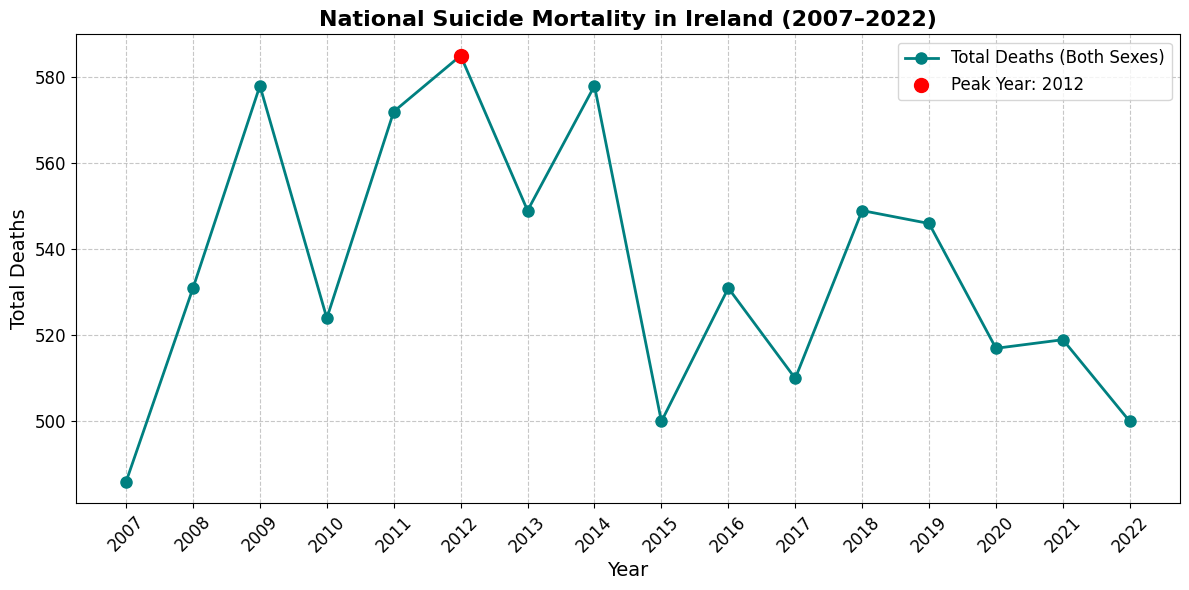

In [86]:
plt.figure(figsize=(12, 6))

plt.plot(
    irish_national_mortality.index,
    irish_national_mortality[total_col],
    marker="o",
    markersize=8,
    linewidth=2,
    color="teal",
    label="Total Deaths (Both Sexes)",
)

plt.scatter(peak_year, peak_value, color="red", 
            s=100, zorder=5, 
            label=f"Peak Year: {peak_year}"
)

plt.title(
    "National Suicide Mortality in Ireland (2007–2022)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Deaths", fontsize=14)
plt.xticks(irish_national_mortality.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

**Interpretation of Results**

This figure shows an overall increase in suicide deaths from 2007, peaking in 2012, followed by a marked decline. While deaths rise again slightly in later years, levels remain below the early-2010s peak, indicating a reduction in national suicide mortality over time.

**Year-on-Year Change in National Suicide Mortality**  

I calculate the year-on-year change in national suicide mortality for all ages and both sexes and visualise these changes using a bar chart. This highlights annual increases and decreases in deaths over time and makes short-term fluctuations more visible than the level trend alone.
I used *diff()* ([w3schools](https://www.w3schools.com/python/pandas/ref_df_diff.asp)) to find the difference between the values for each row and the values from the previous row to calculate the year on year change. [Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) is used to create the bar chart. 

In [87]:
YoY_Change = irish_national_mortality[total_col].diff()

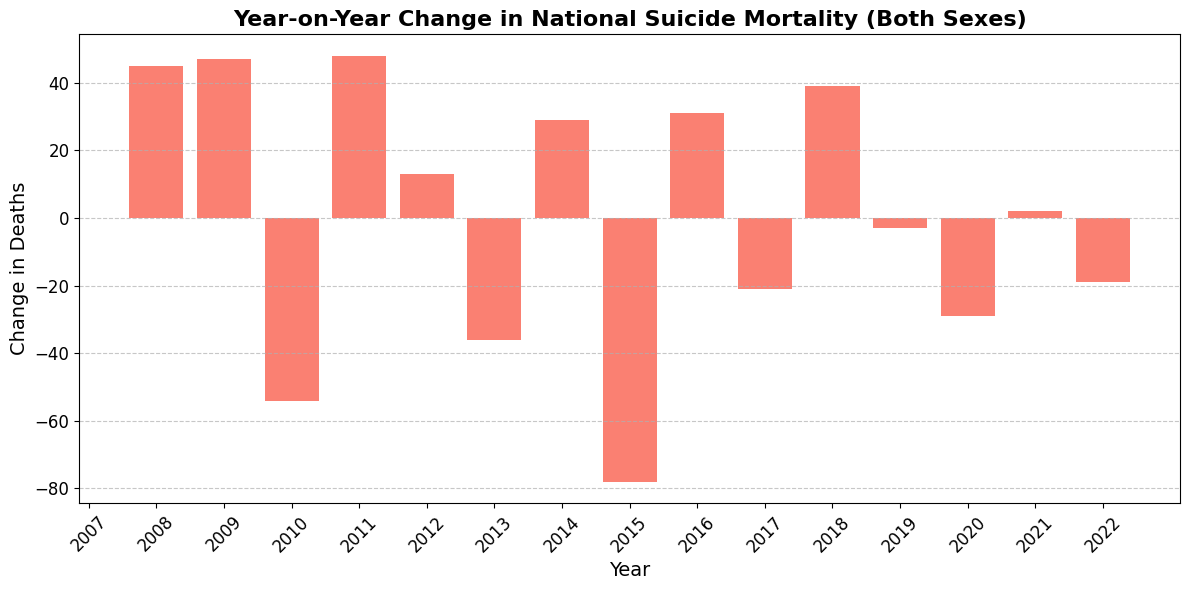

In [88]:
plt.figure(figsize=(12, 6))

plt.bar(
    irish_national_mortality.index,
    YoY_Change,
    color="salmon",
)

plt.title(
    "Year-on-Year Change in National Suicide Mortality (Both Sexes)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Change in Deaths", fontsize=14)
plt.xticks(irish_national_mortality.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

**Interpretation of Results**  

The year-on-year changes highlight substantial volatility in annual suicide deaths, with sharp increases and decreases across the period. The largest decline occurs in 2015, this emphasizes that single-year fluctuations can be pronounced and should be interpreted cautiously.

**Smoothed Mortality Trends (3-Year Rolling Average)**  

I calculate a 3-year rolling average of national suicide mortality to smooth short-term fluctuations and visualise both the raw annual deaths and the smoothed trend. I also highlight the rolling average with a shaded band to emphasise its approximate range over time. *.rolling()* is used to calculate the 3-year rolling average ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)). To create the plot I adapt the code from [GeeksforGeeks](https://www.geeksforgeeks.org/python/plot-multiple-lines-in-matplotlib/) and [GeeksforGeeks](https://www.geeksforgeeks.org/python/matplotlib-pyplot-fill_between-in-python/).

In [89]:
irish_national_mortality["Rolling_3yr_Avg"] = (
    irish_national_mortality[total_col].rolling(window=3, min_periods=1).mean()
)

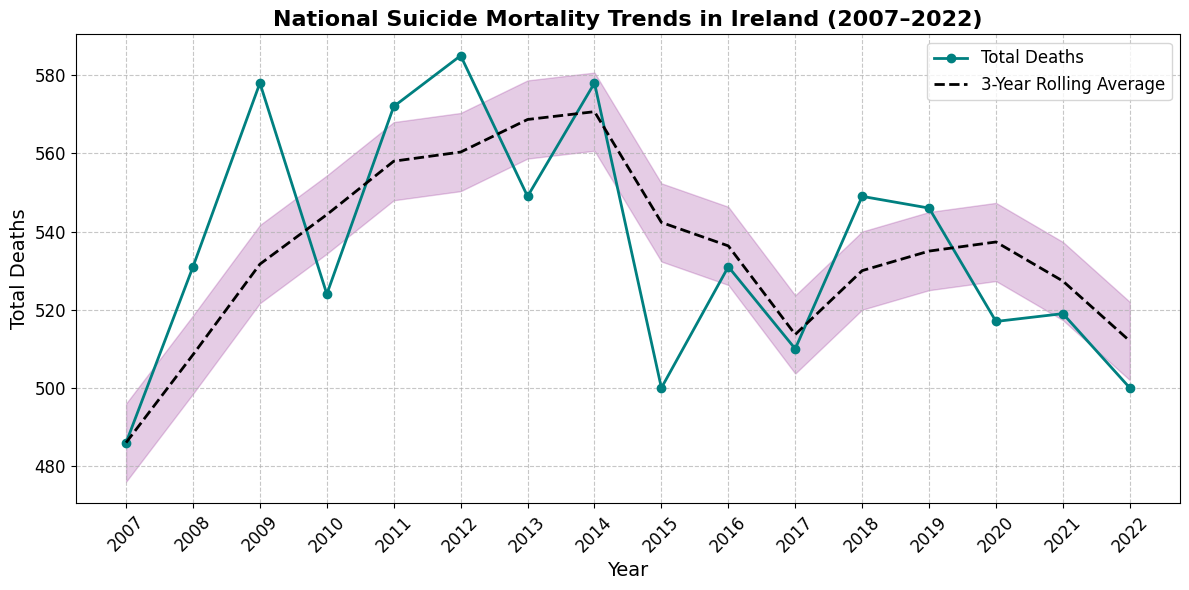

In [90]:
plt.figure(figsize=(12, 6))

plt.plot(
    irish_national_mortality.index,
    irish_national_mortality[total_col],
    marker="o",
    linewidth=2,
    color="teal",
    label="Total Deaths",
)

plt.plot(
    irish_national_mortality.index,
    irish_national_mortality["Rolling_3yr_Avg"],
    linestyle="--",
    color="black",
    linewidth=2,
    label="3-Year Rolling Average",
)

plt.fill_between(
    irish_national_mortality.index,
    irish_national_mortality["Rolling_3yr_Avg"] - 10,
    irish_national_mortality["Rolling_3yr_Avg"] + 10,
    color="purple",
    alpha=0.2,
)

plt.title(
    "National Suicide Mortality Trends in Ireland (2007–2022)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Total Deaths", fontsize=14)
plt.xticks(irish_national_mortality.index, rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

**Interpretation of Results**  

The rolling average smooths short-term variation and confirms a clear rise in suicide mortality up to 2012–2013, followed by a sustained downward trend. This suggests that the post-2012 decline reflects a longer-term pattern rather than isolated yearly changes.

### **3.1.2 Sex-Based Differences in Suicide Mortality**  

Here, I examine differences in suicide mortality patterns between males and females to understand whether trends vary by sex over time.

**Research Questions:**  

- How do trends differ between males and females?

- How unequal is mortality between sexes?

**Extracting National Death Counts by Sex**

I first isolate the “Both sexes”, “Male”, and “Female” totals using the All-Ages category.

In [91]:
female_total = irish_deaths_by_age_sex_pivot[("All ages", "Female")]
male_total = irish_deaths_by_age_sex_pivot[("All ages", "Male")]

sex_mortality_df = pd.DataFrame({
    "Female": female_total,
    "Male": male_total,
})

sex_mortality_df

,Female,Male
Year,,
2007,104,382
2008,131,400
2009,114,464
2010,99,425
2011,99,473
2012,110,475
2013,108,441
2014,106,472
2015,107,393


**Visualising Male vs Female Suicide Mortality Trends**

I plot male and female suicide deaths over time to visually assess differences in scale and trajectory.

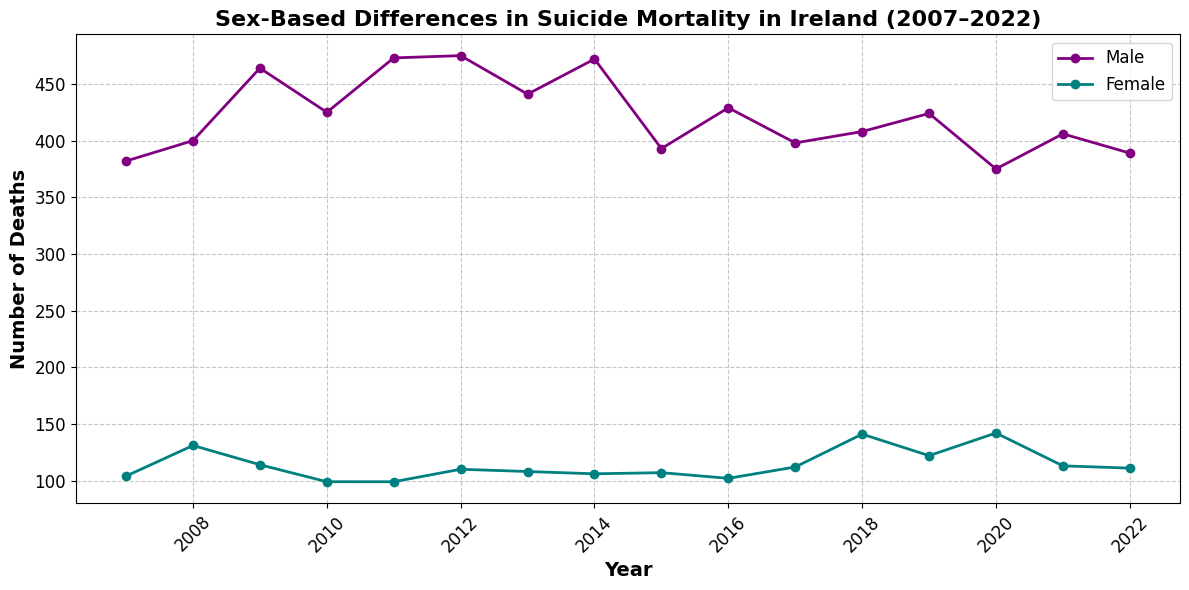

In [92]:
plt.figure(figsize=(12, 6))

plt.plot(
    sex_mortality_df.index,
    sex_mortality_df["Male"],
    marker="o",
    linewidth=2,
    label="Male",
    color="purple"
)

plt.plot(
    sex_mortality_df.index,
    sex_mortality_df["Female"],
    marker="o",
    linewidth=2,
    label="Female", 
    color="Teal"
)

plt.title(
    "Sex-Based Differences in Suicide Mortality in Ireland (2007–2022)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14, weight="bold")
plt.ylabel("Number of Deaths", fontsize=14, weight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

**Interpretation of Results**  

The data shows that male suicide deaths remained consistently higher than female deaths throughout the period, though both groups experienced different levels of stability. Male deaths saw significant fluctuations, rising from 382 in 2007 to a peak of 475 in 2012, before showing a general, albeit inconsistent, downward trend toward 389 in 2022. In contrast, female suicide deaths stayed within a much narrower range, largely remaining between 100 and 115, with notable exceptions in 2008, 2018, and 2020 when figures spiked above 130.

**Calculating the Male-to-Female Mortality Ratio**

To quantify the disparity between sexes, I compute the male-to-female suicide mortality ratio for each year. To do so, I divide male deaths by female deaths ([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html).

In [93]:
sex_mortality_df['male_female_ratio'] = (
    sex_mortality_df['Male'] / sex_mortality_df['Female']
)

sex_mortality_df["male_female_ratio"]


Year
2007    3.673077
2008    3.053435
2009    4.070175
2010    4.292929
2011    4.777778
2012    4.318182
2013    4.083333
2014     4.45283
2015    3.672897
2016    4.205882
2017    3.553571
2018    2.893617
2019     3.47541
2020    2.640845
2021     3.59292
2022    3.504505
Name: male_female_ratio, dtype: Float64

**Visualising the Male-to-Female Suicide Mortality Ratio**

I visualise the male-to-female suicide mortality ratio over time to quantify the scale of sex-based disparities and assess whether the gap narrows or widens across the study period. The parity line at a ratio of 1 represents equal suicide mortality between males and females; values above this line indicate higher male mortality. ([GeeksforGeeks](https://www.geeksforgeeks.org/python/matplotlib-axes-axes-axhline-in-python/)) 

In [94]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(
    sex_mortality_df.index,
    sex_mortality_df["male_female_ratio"],
    marker="o",
    linewidth=2.5,
    color="Teal",
)

plt.axhline(
    y=1,
    linestyle="--",
    color="purple",
    alpha=0.6,
    label="Gender Parity (1:1)",
)

plt.title(
    "Male-to-Female Suicide Mortality Ratio in Ireland (2007–2022)",
    fontsize=16,
    weight="bold",
)
plt.xlabel("Year", fontsize=14, weight="bold")
plt.ylabel("Male-to-Female Mortality Ratio", fontsize=14,
           weight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

NameError: name 'sns' is not defined

**Interpretation of Results**  

The ratio of male-to-female suicide deaths highlights a consistent gender imbalance, with male deaths typically outnumbering female deaths by three to four times. The ratio reached its highest point in 2011 and 2012, where there were approximately 4.8 male deaths for every female death. While the ratio has fluctuated, particularly due to the spikes in female deaths in 2018 and 2020, the most recent data for 2022 shows a ratio of 3.5, indicating that the significant disparity between the sexes persists.

### **3.1.3 Age Group Distribution of Suicide Mortality**  

In this section, I examine how suicide mortality is distributed across age groups in Ireland.
I identify which age groups account for the highest and lowest numbers of deaths and assess how their relative contributions change over time.

**Research Question:**

- Which age groups account for the most and least deaths, and how do their contributions change over time?

**Extracting “Both Sexes” Data by Age Group**

To focus on overall age-related patterns, I restrict the analysis to deaths recorded for both sexes combined, removing sex-specific variation([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html)).

In [ ]:
both_sexes_df = irish_deaths_by_age_sex_pivot.xs(
    key="Both sexes",
    level="Sex",
    axis=1
)

both_sexes_df.head()

Age Group at Death,10 - 14 years,15 - 19 years,20 - 24 years,25 - 29 years,30 - 34 years,35 - 39 years,40 - 44 years,45 - 49 years,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages
Year,,,,,,,,,,,,,,,,,
2007,8,27,69,69,48,44,43,40,44,29,23,15,16,7,4,0,486
2008,4,47,51,72,51,45,54,55,41,33,35,17,15,7,3,1,531
2009,5,38,48,70,62,69,68,56,42,42,37,22,9,8,2,0,578
2010,4,32,58,57,48,66,58,54,49,46,26,10,7,4,4,1,524
2011,0,33,64,65,65,62,63,70,45,29,42,15,8,6,4,1,572


**Calculating Total Deaths by Age Group (Across All Years)**

I aggregate deaths across all years to identify which age groups contribute the most and least to overall suicide mortality. *.sum()* aggregates the deaths across all years ([w3schools](https://www.w3schools.com/python/ref_func_sum.asp)) and *.sort_values(ascending=False)* prints out the highest to lowest values ([Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)).

In [ ]:
age_group_totals = both_sexes_df.sum(axis=0)

age_group_totals.sort_values(ascending=False)

Age Group at Death
All ages             8575
40 - 44 years         954
45 - 49 years         881
35 - 39 years         878
30 - 34 years         862
25 - 29 years         831
50 - 54 years         819
20 - 24 years         786
55 - 59 years         681
60 - 64 years         543
15 - 19 years         468
65 - 69 years         347
70 - 74 years         247
75 - 79 years         131
80 - 84 years          63
10 - 14 years          58
85 years and over      26
dtype: Int64

**Identifying Highest and Lowest Contributing Age Groups**

Here, I first drop `All Ages` so that I can accurately determine the highest age groups. I then identify both extreme values and broader patterns by examining the 3 single highest and lowest age groups ([datascientyst](https://datascientyst.com/get-top-10-highest-lowest-values-pandas/)) as well as the top and bottom contributors overall ([Medium, 2025](https://medium.com/@whyamit101/understanding-pandas-min-max-7c4ee12b4c4d)).

In [ ]:
age_group_totals_clean = age_group_totals.drop("All ages")

In [ ]:
highest_age_groups = age_group_totals_clean.nlargest(3)
lowest_age_groups = age_group_totals_clean.nsmallest(3)

highest_age_groups, lowest_age_groups

(Age Group at Death
 40 - 44 years    954
 45 - 49 years    881
 35 - 39 years    878
 dtype: Int64,
 Age Group at Death
 85 years and over    26
 10 - 14 years        58
 80 - 84 years        63
 dtype: Int64)

In [ ]:
highest_age_group = age_group_totals_clean.idxmax()
lowest_age_group = age_group_totals_clean.idxmin()

highest_age_group, lowest_age_group

('40 - 44 years', '85 years and over')

**Visualising Age Group Distribution of Suicide Mortality**

I use a bar chart arranged in ascending order to clearly compare mortality levels across age groups

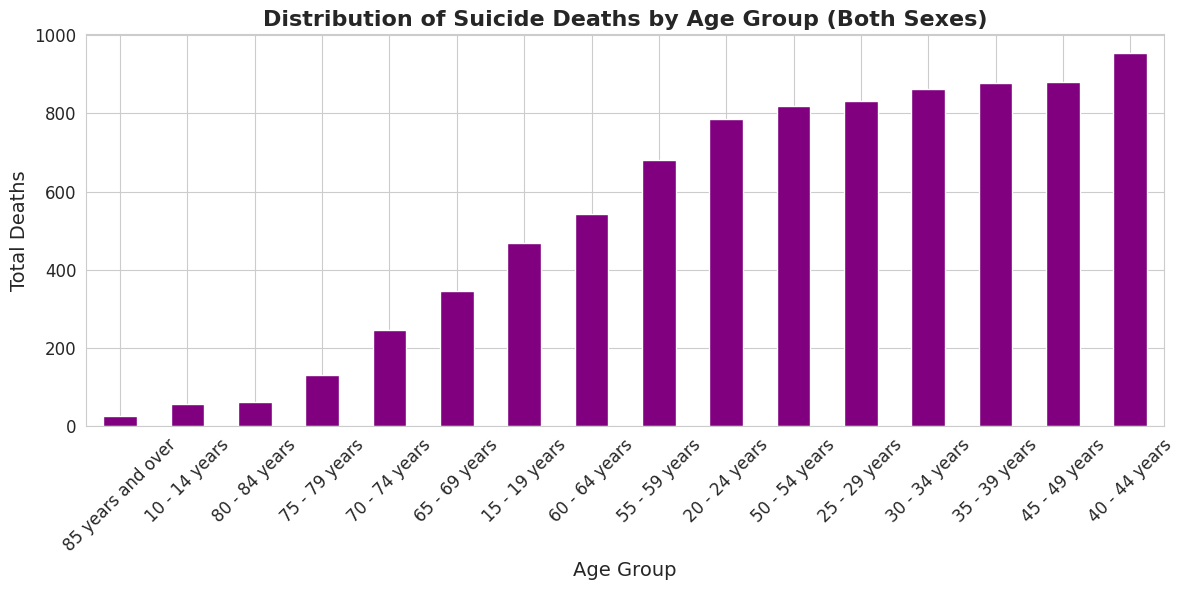

In [ ]:
plt.figure(figsize=(12, 6))

age_group_totals_clean.sort_values().plot(
    kind="bar",
    color="purple"
)

plt.title(
    "Distribution of Suicide Deaths by Age Group (Both Sexes)",
    fontsize=16,
    weight="bold"
)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Total Deaths", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

**Interpretation of Results**  

Over the study period, suicide deaths are clearly concentrated in middle-aged cohorts. The 40–44 age group has the highest total deaths, followed closely by 45–49 and 35–39. In contrast, the oldest (85+) and youngest (10–14) age groups record the fewest deaths, showing that suicide mortality in Ireland is largely concentrated among the working-age population.

**Trends in Suicide Mortality for Highest Age Groups**

I plot yearly suicide deaths for the three age groups with the highest total mortality to examine how trends have changed over time.

<Figure size 1600x600 with 0 Axes>

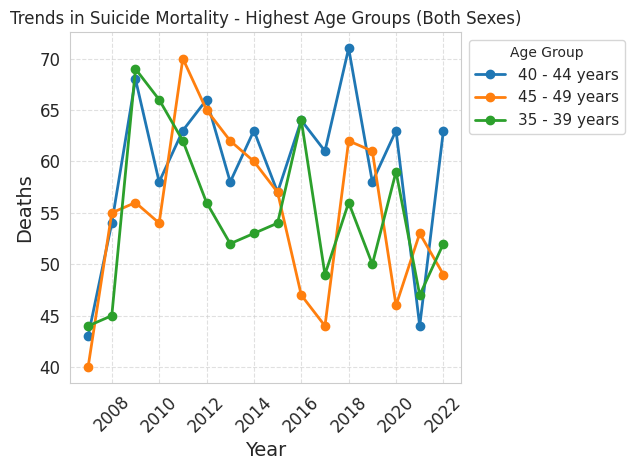

In [ ]:
plt.figure(figsize=(16, 6))

both_sexes_df[highest_age_groups.index].plot(
    marker="o",
    linewidth=2,
    title="Trends in Suicide Mortality - Highest Age Groups (Both Sexes)"
)

plt.xlabel("Year", fontsize=14)
plt.ylabel("Deaths", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Age Group",
        fontsize=11,
        loc="upper left",      
        bbox_to_anchor=(1, 1)  
    )
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

**Interpretation of Results**  

When tracking the three highest-risk age groups over time, the data shows significant annual volatility rather than a uniform trend. The 40–44 age group saw a major spike in 2018, exceeding 70 deaths, while the 45–49 group peaked earlier in 2011. Despite these individual peaks, all three leading age groups (35–39, 40–44, and 45–49) show a general decline in total deaths toward the end of the period in 2022.

**Converting Age Group Deaths to Percentages of Total Mortality**

To better understand each age group’s relative contribution, I convert annual death counts into percentages of total suicide deaths per year. While absolute counts show the number of deaths, percentages provide context on how each age group contributes to overall mortality. 
To do so, I calculate total deaths per year ([w3schools](https://www.w3schools.com/python/ref_func_sum.asp)) and convert each age group’s annual deaths into a percentage of that year’s total to show their relative contribution ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.div.html)).

In [ ]:
yearly_totals = both_sexes_df.sum(axis=1)

age_group_percentages = both_sexes_df.div(
    yearly_totals,
    axis=0
) * 100

age_group_percentages.head()

Age Group at Death,10 - 14 years,15 - 19 years,20 - 24 years,25 - 29 years,30 - 34 years,35 - 39 years,40 - 44 years,45 - 49 years,50 - 54 years,55 - 59 years,60 - 64 years,65 - 69 years,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,All ages
Year,,,,,,,,,,,,,,,,,
2007,0.823045,2.777778,7.098765,7.098765,4.938272,4.526749,4.423868,4.115226,4.526749,2.983539,2.366255,1.54321,1.646091,0.720165,0.411523,0.0,50.0
2008,0.376648,4.425612,4.80226,6.779661,4.80226,4.237288,5.084746,5.178908,3.86064,3.107345,3.295669,1.600753,1.412429,0.659134,0.282486,0.094162,50.0
2009,0.432526,3.287197,4.152249,6.055363,5.363322,5.968858,5.882353,4.844291,3.633218,3.633218,3.200692,1.903114,0.778547,0.692042,0.17301,0.0,50.0
2010,0.381679,3.053435,5.534351,5.438931,4.580153,6.29771,5.534351,5.152672,4.675573,4.389313,2.480916,0.954198,0.667939,0.381679,0.381679,0.09542,50.0
2011,0.0,2.884615,5.594406,5.681818,5.681818,5.41958,5.506993,6.118881,3.933566,2.534965,3.671329,1.311189,0.699301,0.524476,0.34965,0.087413,50.0


**Visualising Age Group Contributions Over Time**

I use a multi-line trend plot instead of a stacked area chart because stacked plots became difficult to read when multiple age groups were included and made individual trends harder to distinguish. The multi-line approach allows me to clearly compare how the proportional contribution of each age group changes over time.

In [ ]:
age_group_percentages_clean = age_group_percentages.drop(
    columns=["All ages"]
)

In [ ]:
# Calculate average percentage contribution per age group
mean_age_contribution = age_group_percentages_clean.mean()

# Select top 5 contributing age groups
top_age_groups = mean_age_contribution.nlargest(5).index

print(top_age_groups)

Index(['40 - 44 years', '45 - 49 years', '35 - 39 years', '30 - 34 years',
       '25 - 29 years'],
      dtype='object', name='Age Group at Death')


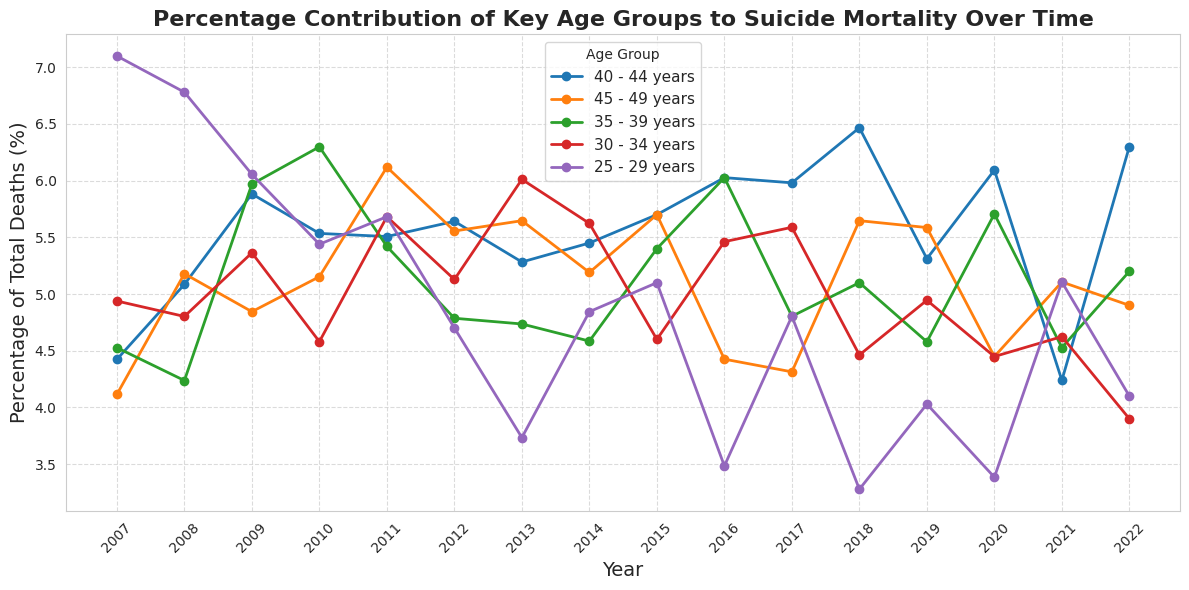

In [ ]:
plt.figure(figsize=(12, 6))

for age_group in top_age_groups:
    plt.plot(
        age_group_percentages_clean.index,
        age_group_percentages_clean[age_group],
        marker="o",
        linewidth=2,
        label=age_group
    )

plt.title(
    "Percentage Contribution of Key Age Groups to Suicide Mortality Over Time",
    fontsize=16,
    weight="bold"
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Percentage of Total Deaths (%)", fontsize=14)
plt.xticks(age_group_percentages_clean.index, rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Age Group", fontsize=11)
plt.tight_layout()

**Interpretation of Results**  

This plot illustrates the relative impact of specific age groups on the total annual mortality figure. The 25–29 age group saw a dramatic decrease in its percentage contribution, falling from over 7% in 2007 to roughly 4% by 2022. In contrast, the 40–44 age group’s contribution has been more erratic, showing a notable increase in its share of total deaths between 2017 and 2018, and again in 2022.

### **3.1.4 Age–Sex Interaction Analysis**  

In this section, I examine whether suicide mortality patterns across age groups differ between males and females. By analysing age-specific distributions separately for each sex, I aim to identify demographic differences in risk that are not visible when sexes are combined.

**Research Question:**

Do age-related suicide patterns vary between males and females?

**Extracting Male and Female Mortality Data**

I first separate the pivot table into male-only and female-only datasets to enable direct comparison. Using *.xs()* allows me to select the data at a particular level ("Sex") of the MultiIndex ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html)). 

In [ ]:
male_df = irish_deaths_by_age_sex_pivot.xs(
    "Male",
    level="Sex",
    axis=1
)

female_df = irish_deaths_by_age_sex_pivot.xs(
    "Female",
    level="Sex",
    axis=1
)

**Calculating Yearly Totals by Sex**

To compare patterns rather than absolute counts, I calculate total deaths per year for males and females separately.

In [ ]:
male_yearly_totals = male_df.sum(axis=1)
female_yearly_totals = female_df.sum(axis=1)

**Converting Age-Group Deaths to Percentages**

I normalise deaths within each sex to percentages so that age distributions can be compared on the same scale. 

In [ ]:
male_percentages = male_df.div(
    male_yearly_totals,
    axis=0
) * 100

female_percentages = female_df.div(
    female_yearly_totals,
    axis=0
) * 100

**Removing "All ages" Category**

In [ ]:
male_percentages = male_percentages.drop(
    columns=["All ages"]
)

female_percentages = female_percentages.drop(
    columns=["All ages"]
)

**Identifing Key Age Groups for Comparison**

To maintain plot readability, I focus on the top 5 age groups with the highest average contribution within each sex.

In [ ]:
top_male_ages = (
    male_percentages.mean()
    .nlargest(5)
    .index
)

top_female_ages = (
    female_percentages.mean()
    .nlargest(5)
    .index
)

**Visualising Age–Sex Interaction Patterns**  

I plot the percentage of total suicide deaths by age group separately for males and females to compare age–sex patterns over time. This side-by-side line chart highlights which age groups contribute most to mortality for each sex and how their relative contributions change across years. I use [Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) and [Matplotlib Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html) to write the code.

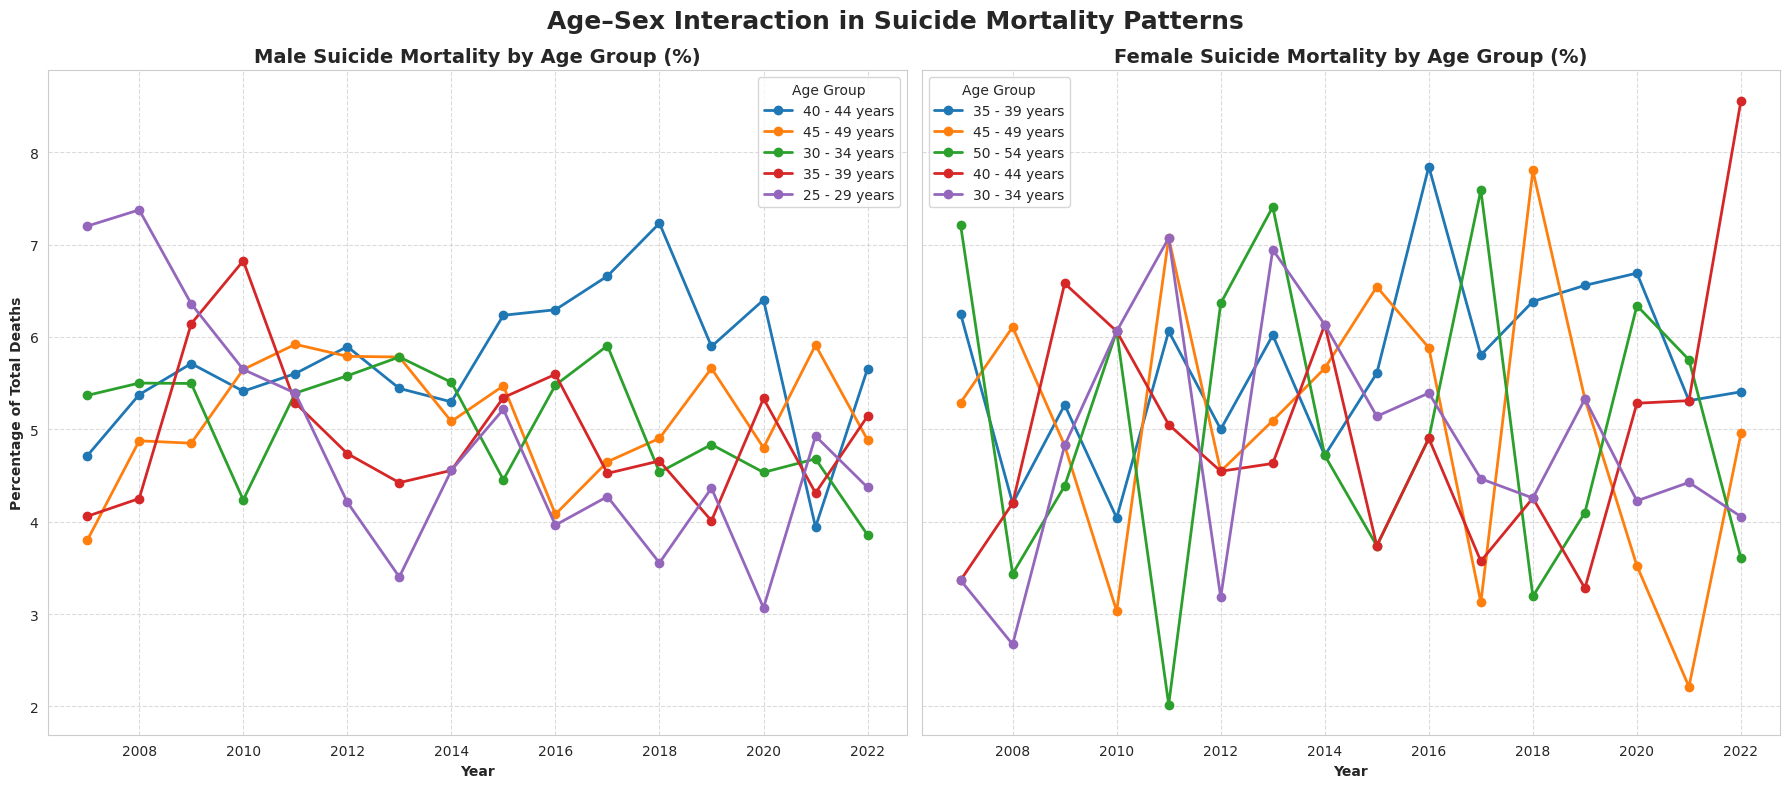

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Male plot
for age_group in top_male_ages:
    axes[0].plot(
        male_percentages.index,
        male_percentages[age_group],
        marker="o",
        linewidth=2,
        label=str(age_group)
    )

axes[0].set_title("Male Suicide Mortality by Age Group (%)", 
                  fontsize=14,
                  weight="bold"
)
axes[0].set_xlabel("Year", weight="bold")
axes[0].set_ylabel("Percentage of Total Deaths", weight="bold")
axes[0].grid(True, linestyle="--", alpha=0.7)
axes[0].legend(title="Age Group")

# Female plot
for age_group in top_female_ages:
    axes[1].plot(
        female_percentages.index,
        female_percentages[age_group],
        marker="o",
        linewidth=2,
        label=str(age_group)
    )

axes[1].set_title("Female Suicide Mortality by Age Group (%)", 
                  fontsize=14,
                  weight="bold"
) 
axes[1].set_xlabel("Year", weight="bold")
axes[1].grid(True, linestyle="--", alpha=0.7)
axes[1].legend(title="Age Group")

plt.suptitle(
    "Age–Sex Interaction in Suicide Mortality Patterns",
    fontsize=18,
    weight="bold"
)
plt.tight_layout()

**Interpretation of Results**  

Male suicide patterns show a clear shift from younger to middle-aged groups, with the 25–29 cohort’s contribution falling significantly since 2007, while the 40–44 group emerged as the primary contributor in later years. Conversely, female mortality is marked by high volatility and sharp, isolated spikes rather than steady trends, most recently seen in a dramatic 2022 increase in the 40–44 age group. Ultimately, male risk appears to be concentrating more consistently in middle age, while female risk remains highly variable across different age groups.

### **3.2 Irish Regional Mortality Analysis (2015-2022)**  

For the second section of the Irish suicide mortality analysis, I examine regional variation in suicide mortality across Irish counties between 2015 and 2022. By analysing county-level data, I assess how suicide mortality differs geographically and whether patterns observed at national level are consistent across regions.

I begin by comparing overall suicide mortality levels across counties to identify areas with relatively high and low numbers of deaths over the study period. I then examine sex-based differences in county-level suicide mortality to determine whether the higher risk observed among males nationally is consistent across all regions or varies geographically. Finally, I assess the stability of suicide mortality trends over time within individual counties by examining changes between the start and end of the study period. This allows me to identify counties showing increasing, decreasing, or unstable mortality patterns.

**Research Questions:**

- How does suicide mortality vary across Irish counties?  
- Are males consistently at higher risk than females across all counties, or do patterns vary by region?
- Which counties demonstrate increasing, decreasing, or unstable suicide mortality trends over time?

In [ ]:
irish_regional_mortality = pd.read_csv('./data/irish_county_deaths_pivot.csv',
    header=[0,1],  
    index_col=0    
)

irish_regional_mortality

County Carlow County Council             Cavan County Council              \
Sex               Both sexes Female Male           Both sexes Female Male   
Year                                                                        
2015                       7      3    4                    7      1    6   
2016                       9      1    8                   16      5   11   
2017                       8      3    5                   12      2   10   
2018                       6      3    3                   14      1   13   
2019                       7      2    5                   13      4    9   
2020                      13      1   12                   16      6   10   
2021                       6      2    4                    6      1    5   
2022                       4      1    3                   16      2   14   

County Clare County Council             Cork City Council  ...  \
Sex              Both sexes Female Male        Both sexes  ...   
Year                                                       ...   
2015                     17      3   14                14  ...   
2016                     15      3   12                24  ...   
2017                     20      2   18                13  ...   
2018                     16      5   11                17  ...   
2019                     14      1   13                20  ...   
2020                     15      4   11                13  ...   
2021                     12      6    6                 6  ...   
2022                     22      5   17                 9  ...   

County Waterford City & County Council Westmeath County Council              \
Sex                               Male               Both sexes Female Male   
Year                                                                          
2015                                10                        6      2    4   
2016                                15                       13      3   10   
2017                                14                        8      2    6   
2018                                13                       13      3   10   
2019                                 9                       10      3    7   
2020                                 9                        7      1    6   
2021                                19                       11      3    8   
2022                                14                       12      4    8   

County Wexford County Council             Wicklow County Council              
Sex                Both sexes Female Male             Both sexes Female Male  
Year                                                                          
2015                       19      3   16                     19      4   15  
2016                       17      2   15                     16      4   12  
2017                       14      1   13                     16      2   14  
2018                       25      8   17                     14      6    8  
2019                       23      3   20                     13      3   10  
2020                       14      5    9                     16      5   11  
2021                       29      8   21                     12      2   10  
2022                       29      8   21                     20      3   17  

[8 rows x 96 columns]

### **3.2.1 County-Level Suicide Mortality Patterns (2015–2022)**

Here, I examine how suicide mortality levels differ across Irish counties in order to identify areas with relatively high and low numbers of deaths during the study period.

**Research Question:**

- How does suicide mortality vary across Irish counties?

**Extracting County-Level Mortality Data**

Firstly, I focus on suicide deaths recorded for both sexes combined to ensure comparability across counties ([pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html)).

In [ ]:
both_sexes_county_df = irish_county_deaths_pivot.xs(
    key="Both sexes",
    level="Sex",
    axis=1
)

both_sexes_county_df.head(3)

County,Carlow County Council,Cavan County Council,Clare County Council,Cork City Council,Cork County Council,Donegal County Council,Dublin City Council,Dún Laoghaire Rathdown County Council,Fingal County Council,Galway City Council,...,Monaghan County Council,Offaly County Council,Roscommon County Council,Sligo County Council,South Dublin County Council,Tipperary County Council,Waterford City & County Council,Westmeath County Council,Wexford County Council,Wicklow County Council
Year,,,,,,,,,,,,,,,,,,,,,
2015,7,7,17,14,46,29,54,5,17,6,...,5,8,10,7,20,22,11,6,19,19
2016,9,16,15,24,47,20,54,15,24,8,...,12,11,8,8,21,25,15,13,17,16
2017,8,12,20,13,45,18,66,18,20,10,...,9,8,4,6,26,22,20,8,14,16


**Summarising Suicide Mortality by County**

I aggregate deaths across all available years to compare overall suicide mortality levels between counties.

In [ ]:
county_totals = both_sexes_county_df.sum(axis=0)

county_totals.head()

County
Carlow County Council     60
Cavan County Council     100
Clare County Council     131
Cork City Council        116
Cork County Council      352
dtype: Int64

**Identifying Counties with the Highest and Lowest Mortality**

To clearly illustrate variation, I identify the top five counties with the highest and lowest total suicide mortality over the period.  

In [ ]:
county_totals = county_totals.drop("Ireland")

In [ ]:
highest_counties = county_totals.nlargest(5)
lowest_counties = county_totals.nsmallest(5)

highest_counties, lowest_counties

(County
 Dublin City Council               447
 Cork County Council               352
 South Dublin County Council       206
 Limerick City & County Council    202
 Kildare County Council            183
 dtype: Int64,
 County
 Leitrim County Council     27
 Longford County Council    42
 Kilkenny County Council    56
 Carlow County Council      60
 Monaghan County Council    60
 dtype: Int64)

**Sorting County Totals**

To improve interpretability, I sort counties by total suicide deaths in ascending order before visualisation, allowing clearer comparison of mortality levels across regions.

In [ ]:
county_totals_sorted = county_totals.sort_values(ascending=True) 

**Visualising County-Level Suicide Mortality**

I use a horizontal bar chart to visually compare suicide mortality levels across Irish counties. To create the horizontal bar chart I adapt the code located at: [GeeksforGeeks](https://www.geeksforgeeks.org/python/draw-a-horizontal-bar-chart-with-matplotlib/).

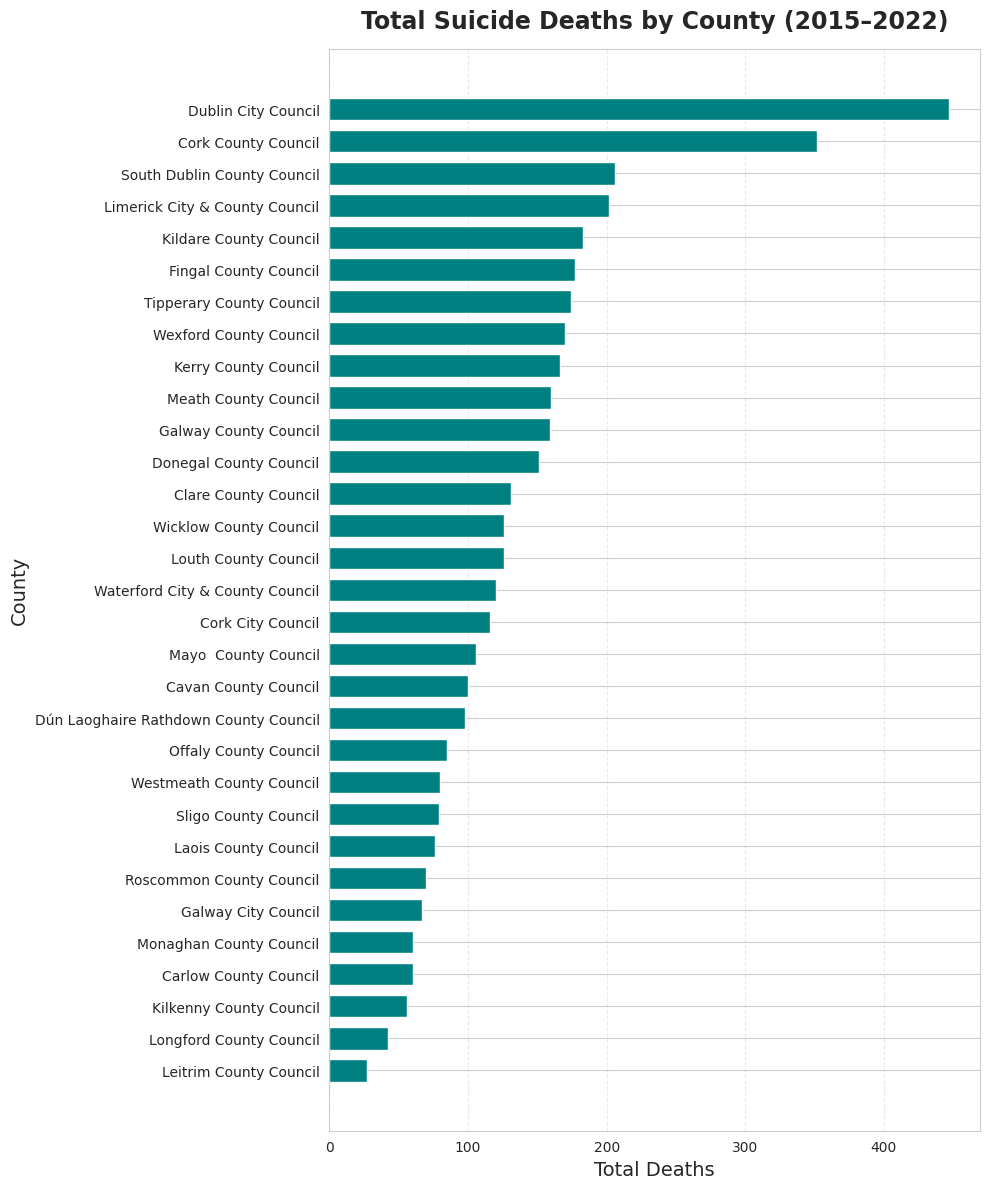

In [ ]:
plt.figure(figsize=(10, 12))

plt.barh(
    county_totals_sorted.index,
    county_totals_sorted.values,
    height=0.7,
    color="Teal"
) 

plt.title(
    "Total Suicide Deaths by County (2015–2022)",
    fontsize=17,
    weight="bold",
    pad=15
)
plt.xlabel("Total Deaths", fontsize=14)
plt.ylabel("County", fontsize=14)

plt.grid(
    axis="x",
    linestyle="--",
    alpha=0.4
)

plt.tight_layout()

**Interpretation of Results**  

The data shows that suicide deaths are highest in major urban centers, with Dublin City Council (447) and Cork County Council (352) recording the highest totals. Mid-sized counties like Kildare and Fingal follow with moderate counts between 150 and 200. Conversely, rural areas such as Leitrim and Longford recorded the lowest figures, both remaining under 50 deaths, indicating that the total volume of mortality is largely concentrated in high-density administrative areas. To see the true severity in these areas, we would need to look at the mortality rate per 100,000 people rather than just the total counts. However, I was unable to find adaquate population data per county for some years, therefore, I was unable to run the calculations. 

### **3.2.2 Sex Differences in Suicide Mortality by County**

In this section, I assess whether sex-based differences in suicide mortality are consistent across Irish counties.

**Research Question:**

- Are males consistently at higher risk than females across all counties, or do patterns vary by region?

**Data Preperation**

To isolate sex-specific patterns, the dataset was separated into male and female suicide deaths at county level.

In [ ]:
male_df = irish_county_deaths_pivot.xs(
    key="Male",
    level="Sex",
    axis=1
)

female_df = irish_county_deaths_pivot.xs(
    key="Female",
    level="Sex",
    axis=1
)

**Aggregating Deaths by County and Sex**

Total deaths were calculated for males and females separately by summing annual values to provide a clear basis for comparing mortality levels between sexes within each county.

In [ ]:
male_totals = male_df.sum()
female_totals = female_df.sum()

Male and female totals were combined into a single table and sorted by male mortality so that sex-based differences could be compared directly within each county and patterns across counties could be more easily identified.

In [ ]:
sex_comparison_df = pd.DataFrame({
    "Male": male_totals,
    "Female": female_totals
}).sort_values(by="Male", ascending=True)

sex_comparison_df

,Male,Female
County,,
Leitrim County Council,22,5
Longford County Council,34,8
Carlow County Council,44,16
Galway City Council,45,22
Kilkenny County Council,45,11
Monaghan County Council,49,11
Roscommon County Council,53,17
Westmeath County Council,59,21
Sligo County Council,62,17


**Visualising Sex Differences Across Counties**

A grouped horizontal bar chart was used to compare male and female suicide mortality within each county. This format was selected due to the large number of counties, as it allows clearer comparison than vertical or stacked plots.

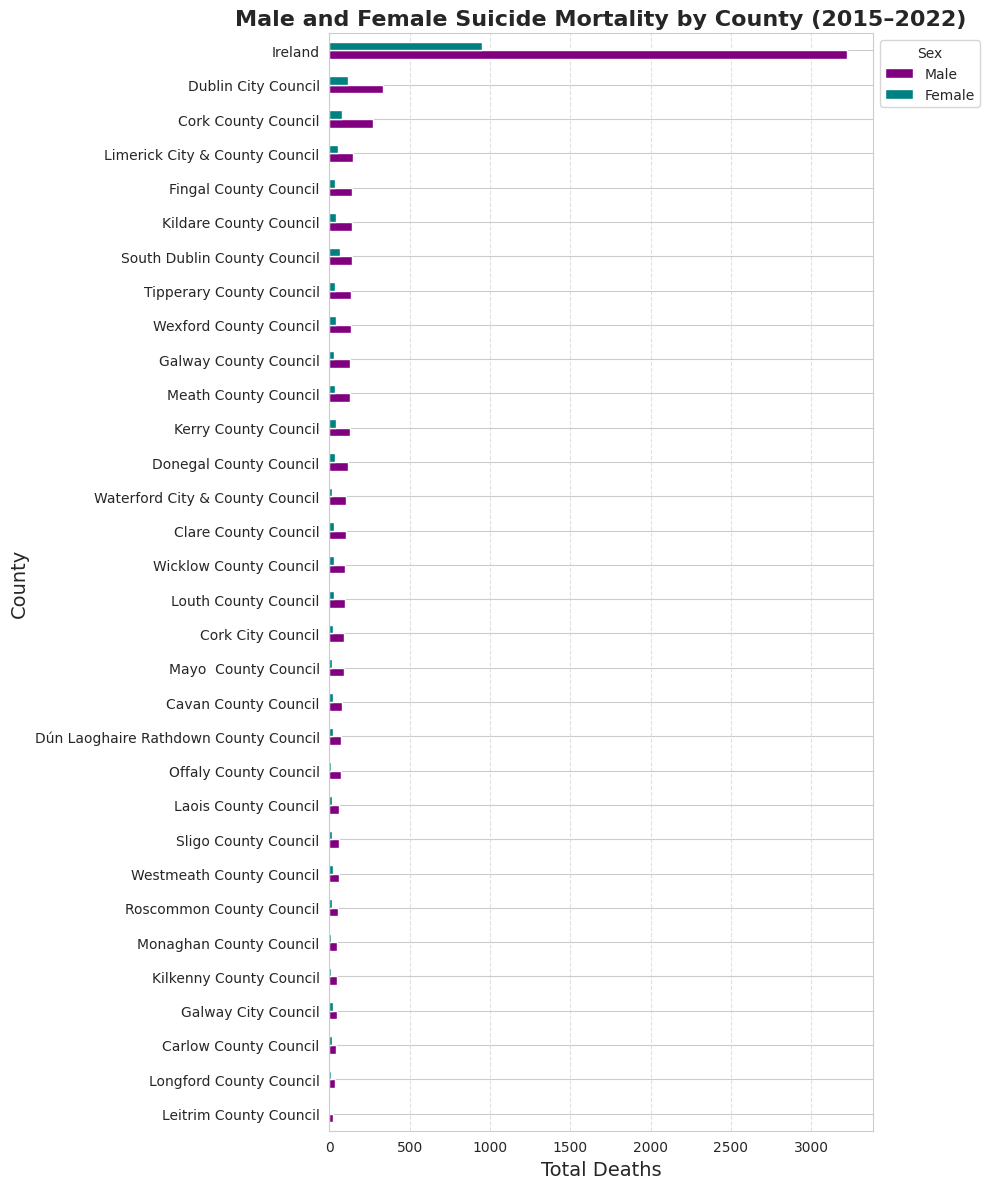

In [ ]:
sex_comparison_df.plot(
    kind="barh",
    figsize=(10, 12),
    color=["purple", "Teal"]
)

plt.title(
    "Male and Female Suicide Mortality by County (2015–2022)",
    fontsize=16,
    weight="bold"
)
plt.xlabel("Total Deaths", fontsize=14)
plt.ylabel("County", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.legend(title="Sex", loc="upper left",      
        bbox_to_anchor=(1, 1)  
    )
plt.tight_layout()

**Interpretation of Results**  

The data confirms that the gender gap is a consistent nationwide trend, with male deaths outnumbering female deaths in every county. High-population areas like Dublin City and Cork County show the highest volumes for both sexes, though male totals remain significantly higher. In smaller counties like Leitrim and Longford, female deaths are extremely low, often barely registering on the scale. While geography dictates the total count, the substantial disparity between sexes persists regardless of location.

**Calculating the Male-to-Female Suicide Mortality Ratio**

I calculate the male-to-female suicide mortality ratio by dividing the total number of male deaths by the total number of female deaths for each county. This produces a standardised measure that quantifies the magnitude of sex-based differences in suicide mortality.

In [ ]:
sex_comparison_df["Male_Female_Ratio"] = (
    sex_comparison_df["Male"] /
    sex_comparison_df["Female"]
)

sex_comparison_df

,Male,Female,Male_Female_Ratio
County,,,
Leitrim County Council,22,5,4.4
Longford County Council,34,8,4.25
Carlow County Council,44,16,2.75
Galway City Council,45,22,2.045455
Kilkenny County Council,45,11,4.090909
Monaghan County Council,49,11,4.454545
Roscommon County Council,53,17,3.117647
Westmeath County Council,59,21,2.809524
Sligo County Council,62,17,3.647059


**Interpretation of Results**  

The data reveals that across Ireland, suicide mortality shows a profound gender gap. For every woman who dies by suicide, approximately 3.39 men do. This imbalance is universal across all counties but is most severe in rural areas like Mayo and Waterford, where the ratio exceeds 6:1. While urban centers like Dublin City record the highest total number of deaths, the data confirms a consistent national crisis that disproportionately affects men in every region.

### **3.2.3 County Trend Stability Over Time**

In this section, I assess how suicide mortality has evolved over time within individual Irish counties to determine whether patterns show growth, decline, or fluctuation. I chose to run this analysis as focusing on change over time allows for a more meaningful regional comparison than relying on single-year totals alone.

**Research Question:**

- Which counties demonstrate increasing, decreasing, or unstable suicide mortality trends over time?

**Estimating Long-Term Change in Mortality**

To quantify trend direction, I calculate the difference between suicide mortality levels in the first and final years of the study period for each county. This provides a straightforward indicator of whether deaths have risen or fallen over time.  

I use *.iloc()* to select rows by their integrer position ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html)). 

In [ ]:
county_totals = both_sexes_county_df

In [ ]:
county_trend_change = (
    county_totals.iloc[-1]  # Selects last row
    - county_totals.iloc[0] # Selects 1st row
)

In [ ]:
county_trend_change = county_trend_change.drop("Ireland")

**Summarising County Trend Patterns**

I convert the   county_trend_change  series into a DataFrame ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html)) and give the single column a descriptive name, summarising the total change in suicide deaths from the first to the last year for each county.

In [ ]:
county_trend_change = county_trend_change.sort_values()

trend_summary = county_trend_change.to_frame(
    name="Total Change (First to Last Year)"
)

trend_summary

,Total Change (First to Last Year)
County,
Dublin City Council,-17
Donegal County Council,-14
Kilkenny County Council,-10
Tipperary County Council,-10
Limerick City & County Council,-7
Laois County Council,-6
Cork City Council,-5
Kerry County Council,-4
Longford County Council,-4


I remove `Leitrim County Council` due to the missing values seen in above table.

In [ ]:
county_trend_change = county_trend_change.drop(
    "Leitrim County Council"
)

**Visualising County-Level Changes in Suicide Mortality** 

I create a horizontal bar chart showing the overall change in suicide deaths for each county from the first to the last year. Bars are coloured teal for decreases and purple for increases, and a vertical line at zero highlights whether a county’s mortality has risen or fallen over the period.

I adapt the code taken from [GeeksforGeeks](https://www.geeksforgeeks.org/python/diverging-bar-chart-using-python/) and [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) to create the chart. 

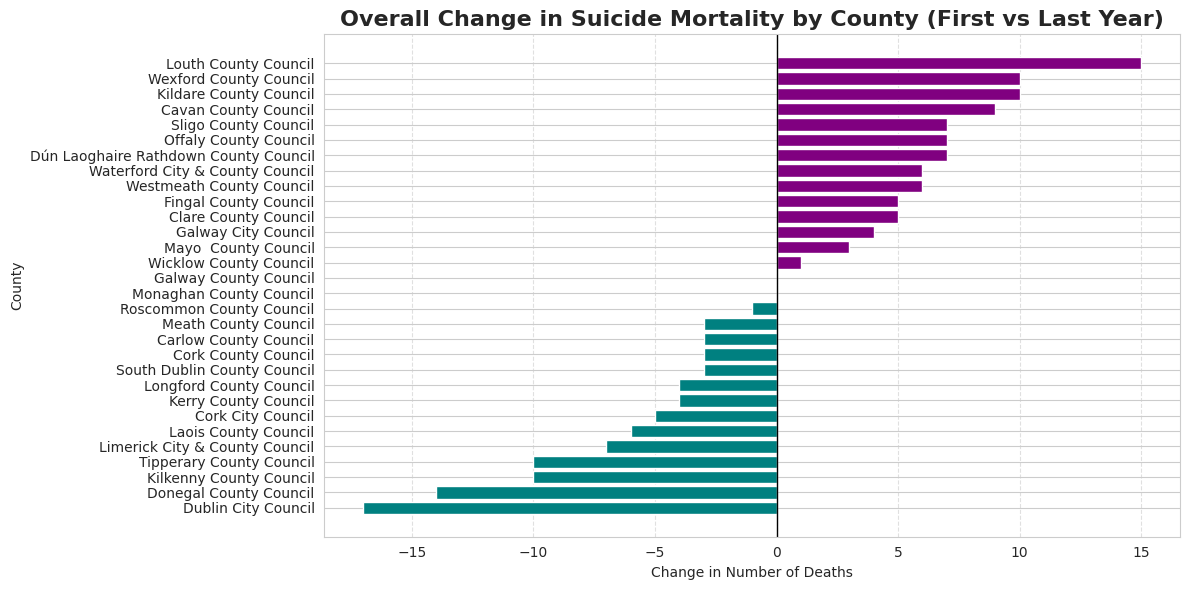

In [ ]:
plt.figure(figsize=(12, 6))

plt.barh(
    county_trend_change.index,
    county_trend_change.values,
    color=[
        "Teal" if value < 0 else "purple"
        for value in county_trend_change.values
    ]
)  
plt.axvline(color="black", linewidth=1)
plt.title(
    "Overall Change in Suicide Mortality by County (First vs Last Year)",
    fontsize=16,
    weight="bold"
)
plt.xlabel("Change in Number of Deaths")
plt.ylabel("County")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()


**Interpretation of Results**  

The plot shows overall changes in suicide mortality by county from the first to the last year. Counties such as Louth, Wexford, Kildare, and Cavan show increasing trends, indicated by positive changes in deaths. In contrast, Dublin City, Donegal, Kilkenny, and several other counties show decreasing trends, with negative changes. Counties with values at or near zero, such as Galway County, Monaghan and Roscommon, suggest relatively stable or minimal change in suicide mortality over the period.

## **4. 🇪🇺 EU Suicide Mortality Analysis (2012-2016)**  

For the final section of my analysis, I analyse suicide mortality patterns across European Union (EU) countries between 2012 and 2016 using standardised mortality rates per 100,000 population.

This analysis is structured into three parts. First, I compare average suicide mortality levels across EU countries to identify those with consistently higher or lower rates over the study period. Second, I examine temporal trends in selected countries to assess how mortality patterns evolve over time. Lastly, I identify countries that consistently deviate from the EU average, highlighting high and low mortality outliers within the EU for this period.  

**Research Questions:**

- How does suicide mortality vary across EU countries?
- Which EU countries experience persistently high or low suicide mortality rates?
- How have suicide mortality patterns changed over time across EU countries?
- How do national suicide mortality rates compare to the EU average?
- Which countries can be considered high or low mortality outliers within the EU context?

The EU suicide mortality dataset uses two-letter country codes to represent individual EU member states. The table below provides the full country names corresponding to each code in the dataset.

**AT** – Austria  
**BE** – Belgium  
**BG** – Bulgaria  
**CY** – Cyprus  
**CZ** – Czech Republic  
**DE** – Germany  
**DK** – Denmark  
**ES** – Spain  
**EE** – Estonia  
**FI** – Finland  
**FR** – France  
**EL** – Greece  
**HR** – Croatia  
**HU** – Hungary  
**IE** – Ireland  
**IT** – Italy  
**LT** – Lithuania  
**LU** – Luxembourg  
**LV** – Latvia  
**MT** – Malta  
**NL** – Netherlands  
**PL** – Poland  
**PT** – Portugal  
**RO** – Romania  
**SK** – Slovakia  
**SI** – Slovenia  
**SE** – Sweden  

In [ ]:
eu_mortality = pd.read_csv('./data/eu_mortality_rate_2012_2016.csv',  
    index_col=0    
)

eu_mortality.head(5)

,AT,BE,BG,CY,CZ,DE,DK,EE,EL,ES,...,LU,LV,MT,NL,PL,PT,RO,SE,SI,SK
YEAR,,,,,,,,,,,,,,,,,,,,,
2012,15.163911,18.264900,11.900824,4.176281,15.677584,12.312036,11.844783,17.883864,4.582188,7.559023,...,9.717006,21.664573,5.987364,10.477965,16.721928,10.190407,12.415409,12.137695,21.406026,10.565618
2013,15.274744,17.013866,9.996451,5.215251,14.957981,12.513079,10.887748,16.512975,0.000000,8.284694,...,7.448249,18.875150,5.219900,11.049148,16.328392,10.024858,12.087867,12.840244,21.662884,11.384562
2014,15.432922,16.975469,10.144078,5.116089,14.154687,12.639991,11.177781,18.315589,5.170769,8.409372,...,12.188910,19.085991,7.473911,10.927378,15.605825,11.709970,11.069161,11.902708,18.825036,10.210584
2015,14.548757,16.605451,9.630581,4.646592,13.133079,12.411707,9.965166,14.830363,4.871976,7.758630,...,11.368521,19.435113,7.748316,11.070530,14.253157,10.889724,11.177291,12.095589,20.456897,0.000000
2016,13.769369,16.841838,9.598258,4.167805,12.469391,11.971911,10.109946,13.906367,4.497509,7.688681,...,7.462052,18.486945,5.337663,11.148988,12.302722,9.461300,9.964280,11.511502,17.973169,7.168852


### **4.1 Cross-Country Comparison of Suicide Mortality Levels**

In this section, I identify EU countries with consistently higher & lower suicide mortality levels across 2012-2016.  

**Research Question:**

- Which EU countries have the highest & lowest suicide mortality rates across 2012-2016?

**Calculating the EU average per year**

I calculate the EU yearly average suicide mortality rate by taking the mean across all countries for each year (axis=1). This creates a single summary value per year that represents the overall EU-level trend in suicide mortality over time.

In [ ]:
eu_yearly_average = eu_mortality.mean(axis=1)

eu_yearly_average

YEAR
2012    13.821151
2013    13.337321
2014    12.941175
2015    11.563363
2016    11.437428
dtype: float64

**EU average across all years**

I then calculate the overall EU average across all years to produce a single summary value for the 2012–2016 period. This provides a benchmark against which individual EU countries can later be compared.

In [ ]:
eu_overall_average = eu_yearly_average.mean()

eu_overall_average

np.float64(12.620087905270555)

**Calculating Average Suicide Mortality by Country** 

I calculate the mean suicide mortality rate for each country across the 2012–2016 period to summarise overall mortality levels over time,

In [ ]:
country_avg_mortality = eu_mortality.mean()

country_avg_mortality

AT    14.837941
BE    17.140305
BG    10.254038
CY     4.664403
CZ    14.078545
DE    12.369745
DK    10.797085
EE    16.289832
EL     3.824488
ES     7.940080
FI    12.235427
FR     8.584799
HR    17.139113
HU    20.741046
IE     8.136957
IT     6.820336
LT    31.584768
LU     9.636948
LV    19.509554
MT     6.353431
NL    10.934802
PL    15.042405
PT    10.455252
RO    11.342802
SE    12.097548
SI    20.064802
SK     7.865923
dtype: float64

**EU Countries with the Highest & Lowest Mortality Rates**

Next, I identify the top 5 EU countries with the highest ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html)) & lowest ([Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html)) mortality rates. 

In [ ]:
lowest_countries = country_avg_mortality.nsmallest(5)
highest_countries = country_avg_mortality.nlargest(5)

print(f"The EU countries with the lowest suicide mortality rates are: {lowest_countries}") 
print(f"The EU countries with the highest suicide mortality rates are: {highest_countries}") 

The EU countries with the lowest suicide mortality rates are: EL    3.824488
CY    4.664403
MT    6.353431
IT    6.820336
SK    7.865923
dtype: float64
The EU countries with the highest suicide mortality rates are: LT    31.584768
HU    20.741046
SI    20.064802
LV    19.509554
BE    17.140305
dtype: float64


**Visualising cross-country comparison**  

I visualise the average standardised suicide mortality rate for each EU country using a horizontal bar chart. This plot allows for straightforward comparison across countries by displaying mean mortality rates (per 100,000 population) over the 2012–2016 period. The horizontal layout improves readability given the number of countries included,

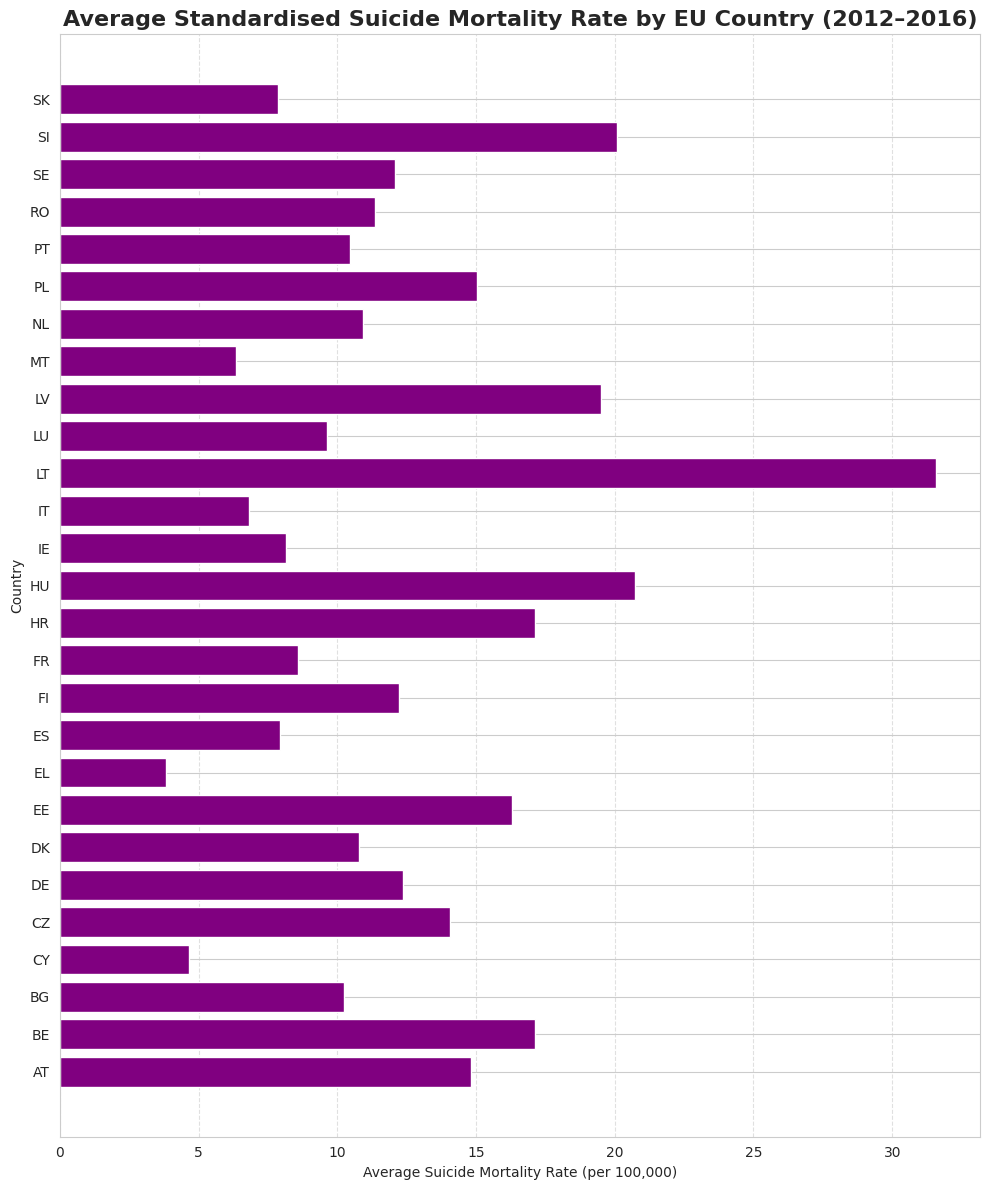

In [ ]:
plt.figure(figsize=(10, 12))

plt.barh(
    country_avg_mortality.index,
    country_avg_mortality.values,
    color="purple"
)

plt.title(
    "Average Standardised Suicide Mortality Rate by EU Country (2012–2016)",
    fontsize=16,
    weight="bold"
)
plt.xlabel("Average Suicide Mortality Rate (per 100,000)")
plt.ylabel("Country")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()

**Findings:**

The above analysis reveals that suicide mortality rates across the EU show a significant disparity between Northern/Eastern and Mediterranean member states. The five countries with the highest rates are led by Lithuania (LT) at 31.58, followed by Hungary (HU) (20.74), Slovenia (SI) (20.06), Latvia (LV) (19.51), and Belgium (BE) (17.14). Conversely, the five lowest rates are found in Greece (EL) at 3.82, Cyprus (CY) (4.66), Malta (MT) (6.35), Italy (IT) (6.82), and Slovakia (SK) (7.87). The data shows that mortality in the highest-ranked country, Lithuania, is more than eight times higher than in the lowest-ranked country, Greece.

### **4.1.2 Temporal Trends in EU Suicide Mortality (2012–2016)**

In this section, I examine how suicide mortality rates change over time across selected EU countries between 2012 and 2016. Rather than plotting all countries simultaneously, I focus on countries with the highest and lowest average suicide mortality rates to improve clarity and support meaningful visual comparison. The aim is to visually assess whether these countries display increasing, decreasing, or relatively stable mortality patterns. 

**Research Questions:**

- How do suicide mortality patterns vary across EU countries over time?

- Which countries appear to have rising, falling, or stable trends based on visual inspection?

**Selecting Countries for Trend Analysis**

I sort countries by their average suicide mortality rate from highest to lowest, then extract the five countries with the highest (*head=5*) and lowest (*tail=5*) rates. I then merge the lowest & highest countries with *.union()* ([GeeksforGeeks](https://www.geeksforgeeks.org/python/union-function-python/)). These countries are selected to focus the analysis on clear contrasts in mortality patterns, allowing meaningful comparison of extreme cases while avoiding overcrowded visualisations.

In [ ]:
country_avg_mortality_sorted = country_avg_mortality.sort_values(ascending=False)

country_avg_mortality_sorted

LT    31.584768
HU    20.741046
SI    20.064802
LV    19.509554
BE    17.140305
HR    17.139113
EE    16.289832
PL    15.042405
AT    14.837941
CZ    14.078545
DE    12.369745
FI    12.235427
SE    12.097548
RO    11.342802
NL    10.934802
DK    10.797085
PT    10.455252
BG    10.254038
LU     9.636948
FR     8.584799
IE     8.136957
ES     7.940080
SK     7.865923
IT     6.820336
MT     6.353431
CY     4.664403
EL     3.824488
dtype: float64

In [ ]:
lowest_countries = country_avg_mortality_sorted.head(5).index
highest_countries = country_avg_mortality_sorted.tail(5).index

selected_countries = lowest_countries.union(highest_countries)

selected_countries

Index(['BE', 'CY', 'EL', 'HU', 'IT', 'LT', 'LV', 'MT', 'SI', 'SK'], dtype='object')

**Visualising Temporal Trends in Selected EU Countries**

I use a multi-line time series plot to visualise suicide mortality trends for the selected countries. I adapt the code taken from [Datacamp](https://www.datacamp.com/tutorial/matplotlib-time-series-line-plot) to create the plot.

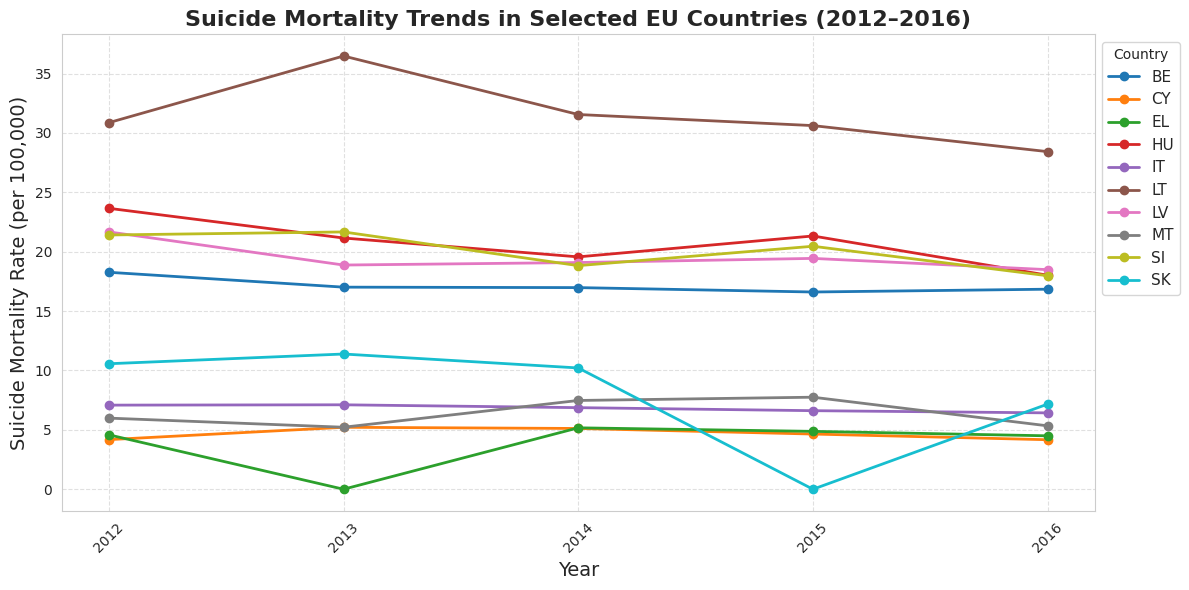

In [ ]:
plt.figure(figsize=(12, 6))

for country in selected_countries:
    plt.plot(
        eu_mortality.index,
        eu_mortality[country],
        marker="o",
        linewidth=2,
        label=country
    )

plt.title(
    "Suicide Mortality Trends in Selected EU Countries (2012–2016)",
    fontsize=16,
    weight="bold"
)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Suicide Mortality Rate (per 100,000)", fontsize=14)
plt.xticks(eu_mortality.index, rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Country", 
           fontsize=11,
           loc="upper left",      
           bbox_to_anchor=(1, 1)  
    )
plt.tight_layout()

**Interpretation of Results**  

Visual inspection of mortality trends from 2012–2016 shows distinct patterns across EU countries. Lithuania (LT) records the steepest decline, falling from over 35 per 100,000 in 2013 to around 28 by 2016, with Hungary (HU), Slovenia (SI), and Latvia (LV) also showing steady reductions from high baselines. In contrast, Belgium (BE), Italy (IT), and Cyprus (CY) remain largely stable with minimal annual variation. Volatile trends are observed in Slovakia (SK), which dropped to zero in 2015 before rebounding in 2016, and Malta (MT), which fluctuated between 5 and 8 per 100,000.

### **4.1.3 Identification of High and Low Mortality Outliers**

For my final analysis, I am identifying which EU countries consistently deviate from the EU average suicide mortality rate. This helps me to highlight countries with persistently high or low mortality levels relative to the overall European context.  

To detect outliers in a consistent and interpretable way, I compare each country’s mean standardised suicide mortality rate (2012–2016) to the EU-wide average over the same period.

Countries are classified as:

- High outliers: substantially above the EU average

- Low outliers: substantially below the EU average

**Research Question:**

- Which countries consistently record suicide mortality rates that are substantially higher or lower than the EU average?

**Measuring Deviation from the EU Average**

I calculate the mortality deviation by subtracting the EU-wide average mortality rate from each country’s average. Positive values indicate a country is above the average, and negative values indicate it is below. I then sort these deviations to see which countries are furthest below or above the EU average.

In [ ]:
mortality_deviation = country_avg_mortality - eu_overall_average

mortality_deviation.sort_values()

EL    -8.795599
CY    -7.955684
MT    -6.266657
IT    -5.799752
SK    -4.754165
ES    -4.680008
IE    -4.483131
FR    -4.035289
LU    -2.983140
BG    -2.366049
PT    -2.164836
DK    -1.823003
NL    -1.685286
RO    -1.277286
SE    -0.522540
FI    -0.384661
DE    -0.250343
CZ     1.458457
AT     2.217853
PL     2.422317
EE     3.669744
HR     4.519025
BE     4.520217
LV     6.889466
SI     7.444714
HU     8.120958
LT    18.964680
dtype: float64

**Identifing High and Low Outlier Countries**

Here, I define outliers as the top 5 countries with the largest positive and negative deviations from the EU average.

In [ ]:
low_outliers = mortality_deviation.nsmallest(5)
high_outliers = mortality_deviation.nlargest(5)

low_outliers, high_outliers

(EL   -8.795599
 CY   -7.955684
 MT   -6.266657
 IT   -5.799752
 SK   -4.754165
 dtype: float64,
 LT    18.964680
 HU     8.120958
 SI     7.444714
 LV     6.889466
 BE     4.520217
 dtype: float64)

**Visualising Deviations from the EU Average**

I first create a list of colors to use for my bar chart by checking each country’s deviation from the EU average. For each value in the sorted deviations, I assign purple if the deviation is positive (above the EU average) and teal if it is negative (below the EU average).

I then create a bar chart to visualize how each country’s average mortality rate deviates from the EU average. I first sort the deviations so I can clearly see which countries fall below or above the average. I plot each country as a bar and add a horizontal line at zero to mark the EU average using *plt.axhline()* ([GeeksforGeeks](https://www.geeksforgeeks.org/python/matplotlib-axes-axes-axhline-in-python/)).

In [ ]:
colors = [
    "purple" if value > 0 else "Teal"
    for value in mortality_deviation.sort_values()
]

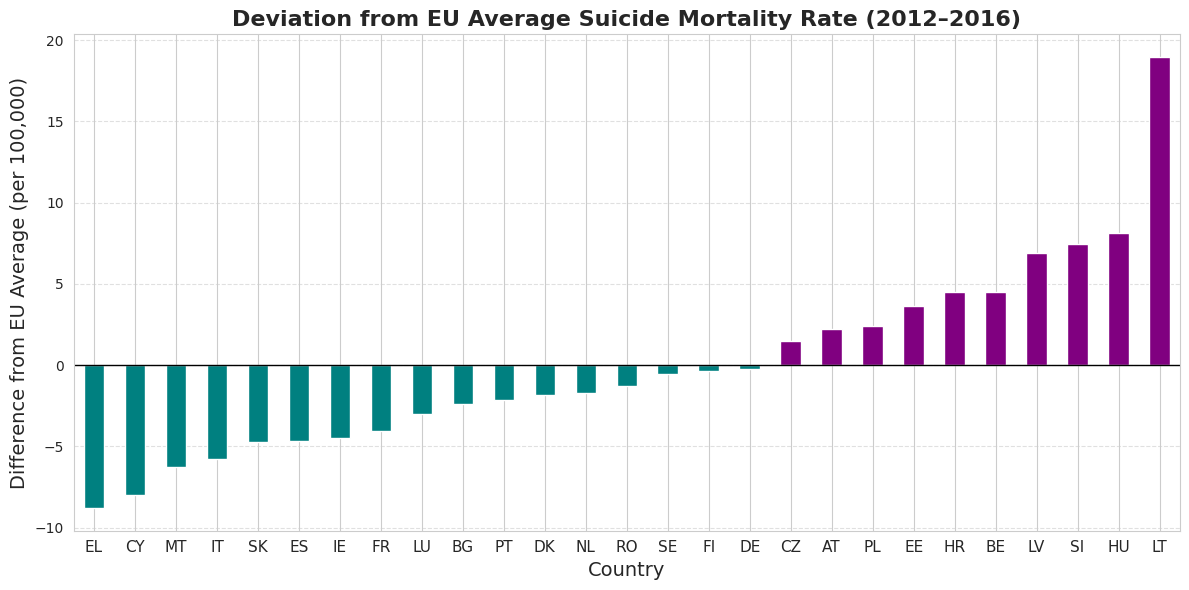

In [ ]:
plt.figure(figsize=(12, 6))

mortality_deviation.sort_values().plot(
    kind="bar",
    color=colors
)

plt.axhline(
    y=0,
    color="black",
    linewidth=1
)

plt.title(
    "Deviation from EU Average Suicide Mortality Rate (2012–2016)",
    fontsize=16,
    weight="bold"
)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Difference from EU Average (per 100,000)", fontsize=14)
plt.xticks(
    rotation=0,
    ha="center",
    fontsize=11
)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

**Interpretation of Findings**

Between 2012 and 2016, Lithuania (LT), Hungary (HU), and Slovenia (SI) were the primary high-mortality outliers. Greece (EL) and Cyprus (CY) recorded the lowest mortality rates during this period. They were followed by Malta (MT), Italy (IT), and Slovakia (SK), all of which remained consistently below the EU average. Ireland (IE) recorded a mortality rate roughly 4 points below the EU average, placing it among the lower-mortality group alongside nations like France (FR) and Spain (ES).

**Conclusion of Findings**

In my project, I analyzed suicide mortality patterns in Ireland nationally (2007–2022) and at regional level (2015-2022). I also I analyzed suicide mortality patterns across the EU (2012–2016). I must acknowledge that this data should be interpreted with caution, as suicide is widely recognized to be underreported due to stigma, misclassification of deaths, and varying reporting processes; therefore, these findings reflect reported mortality rather than the true underlying incidence.

Nationally, I found that Irish suicide deaths peaked in 2012 before entering a sustained downward trend, with risk shifting from younger demographics toward middle-aged cohorts. My data identifies middle-aged men as the group most at risk in Ireland, specifically those in the 40–44 and 45–49 age groups, who consistently account for the highest total deaths. I also confirmed a profound gender gap where men account for the vast majority of deaths, averaging a national ratio of 3.39 males for every female, an imbalance that is most extreme in rural counties like Mayo and Waterford where ratios exceed 6:1. Geographically, while the highest volumes of deaths are concentrated in urban centers like Dublin City and Cork County, I observed rising trends in counties like Louth and Cavan, contrasting with significant decreases in Donegal and Kilkenny. 

At the EU level, the analysis revealed a clear disparity between countries for years 2012-2016. Lithuania, Hungary, Slovenia, Latvia, and Belgium have the highest recorded suicide rates, while Greece, Cyprus, Malta, Italy, and Slovakia have the lowest. Between 2012 and 2016, Lithuania, Hungary, and Slovenia show declining trends from high baselines, Belgium, Italy, and Cyprus remain stable, and Slovakia and Malta show more volatile patterns. Ireland’s rate is slightly below the EU average, placing it in the lower-mortality group alongside France and Spain.

Overall, the analysis highlights consistent gender differences, age-related risk, geographic concentration, and wide variation across EU countries.

# END